In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图片保存路径和格式
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# 加载数据
df = pd.read_csv('train.csv')

# 查看数据基本信息
print("=== 数据基本信息 ===")
print(f"数据形状: {df.shape}")
print(f"数据类型:\n{df.dtypes.value_counts()}")
print("\n=== 前5行数据 ===")
print(df.head())

# 查看目标变量SalePrice的分布
print("\n=== SalePrice基本统计信息 ===")
print(df['SalePrice'].describe())

# 可视化SalePrice分布
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['SalePrice'], bins=50, edgecolor='black')
plt.title('SalePrice分布')
plt.xlabel('价格')
plt.ylabel('频数')

plt.subplot(1, 2, 2)
plt.hist(np.log(df['SalePrice']), bins=50, edgecolor='black')
plt.title('log(SalePrice)分布')
plt.xlabel('log(价格)')
plt.ylabel('频数')
plt.tight_layout()
plt.savefig('1_saleprice_distribution.png')
plt.close()

# 查看主要数值特征的分布
numerical_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        axes[i].hist(df[feature], bins=30, edgecolor='black')
        axes[i].set_title(f'{feature}分布')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('频数')

# 最后一个子图用于显示相关性矩阵
corr_matrix = df[numerical_features + ['SalePrice']].corr()
im = axes[-1].imshow(corr_matrix, cmap='coolwarm', aspect='auto')
axes[-1].set_xticks(range(len(corr_matrix.columns)))
axes[-1].set_yticks(range(len(corr_matrix.columns)))
axes[-1].set_xticklabels(corr_matrix.columns, rotation=45)
axes[-1].set_yticklabels(corr_matrix.columns)
axes[-1].set_title('主要特征相关性矩阵')

# 添加颜色条
cbar = plt.colorbar(im, ax=axes[-1], shrink=0.8)
cbar.set_label('相关系数')

plt.tight_layout()
plt.savefig('2_numerical_features_analysis.png')
plt.close()

# 检查缺失值
missing_data = pd.DataFrame({
    '特征名称': df.columns,
    '缺失值数量': df.isnull().sum(),
    '缺失值比例(%)': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data[missing_data['缺失值数量'] > 0].sort_values('缺失值比例(%)', ascending=False)
print("\n=== 缺失值统计结果 ===")
print(missing_data.head(10).round(2))

# 可视化缺失值分布（前20个有缺失值的特征）
plt.figure(figsize=(12, 8))
top_missing_features = missing_data.head(20)['特征名称'].tolist()
sns.heatmap(df[top_missing_features].isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('缺失值分布热力图（前20个特征）')
plt.tight_layout()
plt.savefig('3_missing_values_heatmap.png')
plt.close()

print("\n=== 第一部分分析完成 ===")
print("生成的图片文件:")
print("1. 1_saleprice_distribution.png - 房价分布分析")
print("2. 2_numerical_features_analysis.png - 主要数值特征分析")
print("3. 3_missing_values_heatmap.png - 缺失值分布热力图")

=== 数据基本信息 ===
数据形状: (1460, 81)
数据类型:
object     43
int64      35
float64     3
Name: count, dtype: int64

=== 前5行数据 ===
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ... 

In [12]:
# 导入依赖库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体（避免中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图片保存路径和格式
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# 假设你已加载原始数据df（若未加载，需先运行数据加载代码）
# df = pd.read_csv('train.csv')  # 若未加载，取消注释并替换为你的数据路径


# 第二步：缺失值检测与处理
print("=== 第二步：缺失值检测与处理 ===")

# 1. 缺失值检测
missing_data = pd.DataFrame({
    '特征名称': df.columns,
    '缺失值数量': df.isnull().sum(),
    '缺失值比例(%)': (df.isnull().sum() / len(df)) * 100
})

# 筛选出有缺失值的特征并按缺失比例排序
missing_data = missing_data[missing_data['缺失值数量'] > 0].sort_values('缺失值比例(%)', ascending=False)

print("=== 缺失值统计结果 ===")
print(missing_data.round(2))  # 保留两位小数显示

# 2. 可视化缺失值分布（只显示有缺失值的特征）
plt.figure(figsize=(14, 10))
missing_features = missing_data['特征名称'].tolist()

# 创建子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# 子图1：缺失值分布热力图
sns.heatmap(df[missing_features].isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=ax1)
ax1.set_title('缺失值分布热力图', fontsize=14)

# 子图2：缺失值比例柱状图
missing_data_sorted = missing_data.sort_values('缺失值比例(%)')
colors = plt.cm.viridis(np.linspace(0, 1, len(missing_data_sorted)))
bars = ax2.barh(range(len(missing_data_sorted)), missing_data_sorted['缺失值比例(%)'], color=colors)
ax2.set_yticks(range(len(missing_data_sorted)))
ax2.set_yticklabels(missing_data_sorted['特征名称'])
ax2.set_xlabel('缺失值比例(%)')
ax2.set_title('各特征缺失值比例', fontsize=14)
ax2.grid(True, alpha=0.3, axis='x')

# 在柱状图上添加数值标签
for i, (bar, value) in enumerate(zip(bars, missing_data_sorted['缺失值比例(%)'])):
    ax2.text(value + 1, bar.get_y() + bar.get_height()/2, 
             f'{value:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('4_missing_values_analysis.png')
plt.close()

# 3. 缺失值处理函数
def handle_missing_values(df):
    df_processed = df.copy()  # 复制数据，避免修改原始数据
    
    # 分类特征：NA表示"无此特征"，用'None'填充
    categorical_na_as_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                             'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
                             'GarageType', 'GarageFinish', 'GarageQual', 
                             'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
    
    for feature in categorical_na_as_none:
        if feature in df_processed.columns:
            df_processed[feature] = df_processed[feature].fillna('None')
            print(f"处理特征 {feature}: 用'None'填充缺失值")
    
    # 数值特征：NA表示"面积/数量为0"，用0填充
    numerical_na_as_zero = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                           'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 
                           'GarageCars', 'GarageArea']
    
    for feature in numerical_na_as_zero:
        if feature in df_processed.columns:
            df_processed[feature] = df_processed[feature].fillna(0)
            print(f"处理特征 {feature}: 用0填充缺失值")
    
    # 特殊处理：LotFrontage用同小区中位数填充
    if 'LotFrontage' in df_processed.columns:
        df_processed['LotFrontage'] = df_processed.groupby('Neighborhood')['LotFrontage'].transform(
            lambda x: x.fillna(x.median())
        )
        print("处理特征 LotFrontage: 用同小区中位数填充缺失值")
    
    # 其他分类特征：用众数填充
    for col in df_processed.select_dtypes(include=['object']).columns:
        if df_processed[col].isnull().any():
            mode_value = df_processed[col].mode()[0]
            df_processed[col] = df_processed[col].fillna(mode_value)
            print(f"处理特征 {col}: 用众数'{mode_value}'填充缺失值")
    
    return df_processed

# 关键步骤：调用缺失值处理函数
df_clean = handle_missing_values(df)

# 4. 验证处理结果
print("\n=== 缺失值处理结果验证 ===")
missing_before = df.isnull().sum().sum()
missing_after = df_clean.isnull().sum().sum()
completion_rate = ((missing_before - missing_after) / missing_before * 100) if missing_before > 0 else 100

print(f"处理前总缺失值数量: {missing_before}")
print(f"处理后总缺失值数量: {missing_after}")
print(f"缺失值处理完成率: {completion_rate:.2f}%")

# 5. 可视化处理效果对比
plt.figure(figsize=(12, 6))

# 创建对比数据
comparison_data = pd.DataFrame({
    '处理前': [missing_before],
    '处理后': [missing_after]
})

# 绘制对比柱状图
ax = comparison_data.plot(kind='bar', figsize=(10, 6), color=['#FF6B6B', '#4ECDC4'])
plt.title('缺失值处理效果对比', fontsize=14)
plt.ylabel('缺失值数量')
plt.xticks([])  # 隐藏x轴标签
plt.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for i, v in enumerate(comparison_data.iloc[0]):
    ax.text(i, v + max(missing_before, missing_after) * 0.01, 
            str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('5_missing_values_comparison.png')
plt.close()

print("\n=== 第二部分分析完成 ===")
print("生成的图片文件:")
print("4. 4_missing_values_analysis.png - 缺失值详细分析")
print("5. 5_missing_values_comparison.png - 缺失值处理效果对比")

=== 第二步：缺失值检测与处理 ===
=== 缺失值统计结果 ===
                      特征名称  缺失值数量  缺失值比例(%)
PoolQC              PoolQC   1453     99.52
MiscFeature    MiscFeature   1406     96.30
Alley                Alley   1369     93.77
Fence                Fence   1179     80.75
MasVnrType      MasVnrType    872     59.73
FireplaceQu    FireplaceQu    690     47.26
LotFrontage    LotFrontage    259     17.74
GarageType      GarageType     81      5.55
GarageYrBlt    GarageYrBlt     81      5.55
GarageFinish  GarageFinish     81      5.55
GarageQual      GarageQual     81      5.55
GarageCond      GarageCond     81      5.55
BsmtFinType2  BsmtFinType2     38      2.60
BsmtExposure  BsmtExposure     38      2.60
BsmtFinType1  BsmtFinType1     37      2.53
BsmtCond          BsmtCond     37      2.53
BsmtQual          BsmtQual     37      2.53
MasVnrArea      MasVnrArea      8      0.55
Electrical      Electrical      1      0.07
处理特征 Alley: 用'None'填充缺失值
处理特征 BsmtQual: 用'None'填充缺失值
处理特征 BsmtCond: 用'None'填充缺失值
处理

<Figure size 1400x1000 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

✓ 使用已有的df_clean数据集

=== 第三步：异常值检测与处理 ===
=== 待检测异常值的核心数值特征 ===
特征列表: ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'SalePrice']
数据形状: (1460, 9)

=== 异常值检测结果 ===
IQR法检测到异常值数量: 208 (占总数据14.25%)
Z-score法检测到异常值数量: 63 (占总数据4.32%)
两种方法共同检测到的异常值数量: 63

=== 部分异常值样本（房价相关） ===
      GrLivArea  TotalBsmtSF  GarageArea  SalePrice
384        1953         1580         501     240000
769        3279         1650         841     538000
898        2364         2330         820     611657
897        2240            0         528     142953
1024       2898         1565         665     287000


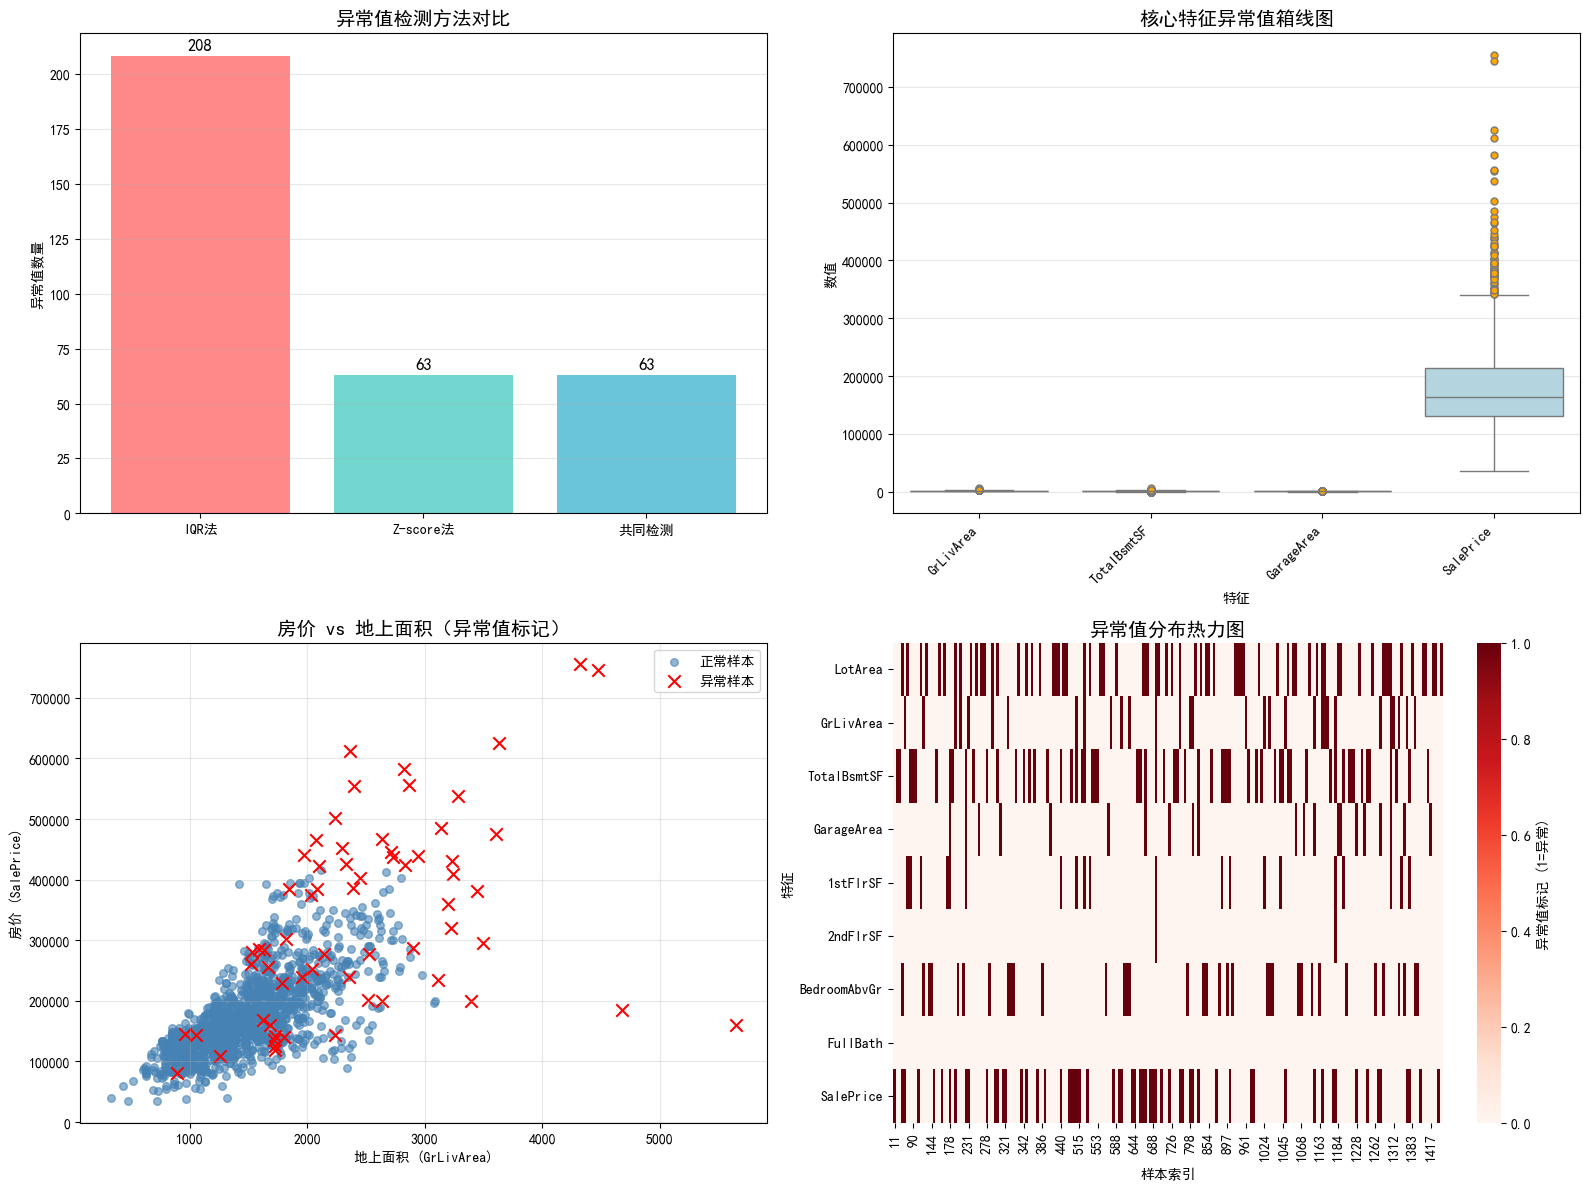

处理特征 LotArea: 缩尾范围 [1680.00, 37567.64]
处理特征 GrLivArea: 缩尾范围 [692.18, 3123.48]
处理特征 TotalBsmtSF: 缩尾范围 [0.00, 2155.05]
处理特征 GarageArea: 缩尾范围 [0.00, 1002.79]
处理特征 1stFlrSF: 缩尾范围 [520.00, 2219.46]
处理特征 2ndFlrSF: 缩尾范围 [0.00, 1418.92]
处理特征 BedroomAbvGr: 缩尾范围 [1.00, 5.00]
处理特征 FullBath: 缩尾范围 [1.00, 3.00]
处理特征 SalePrice: 缩尾范围 [61815.97, 442567.01]


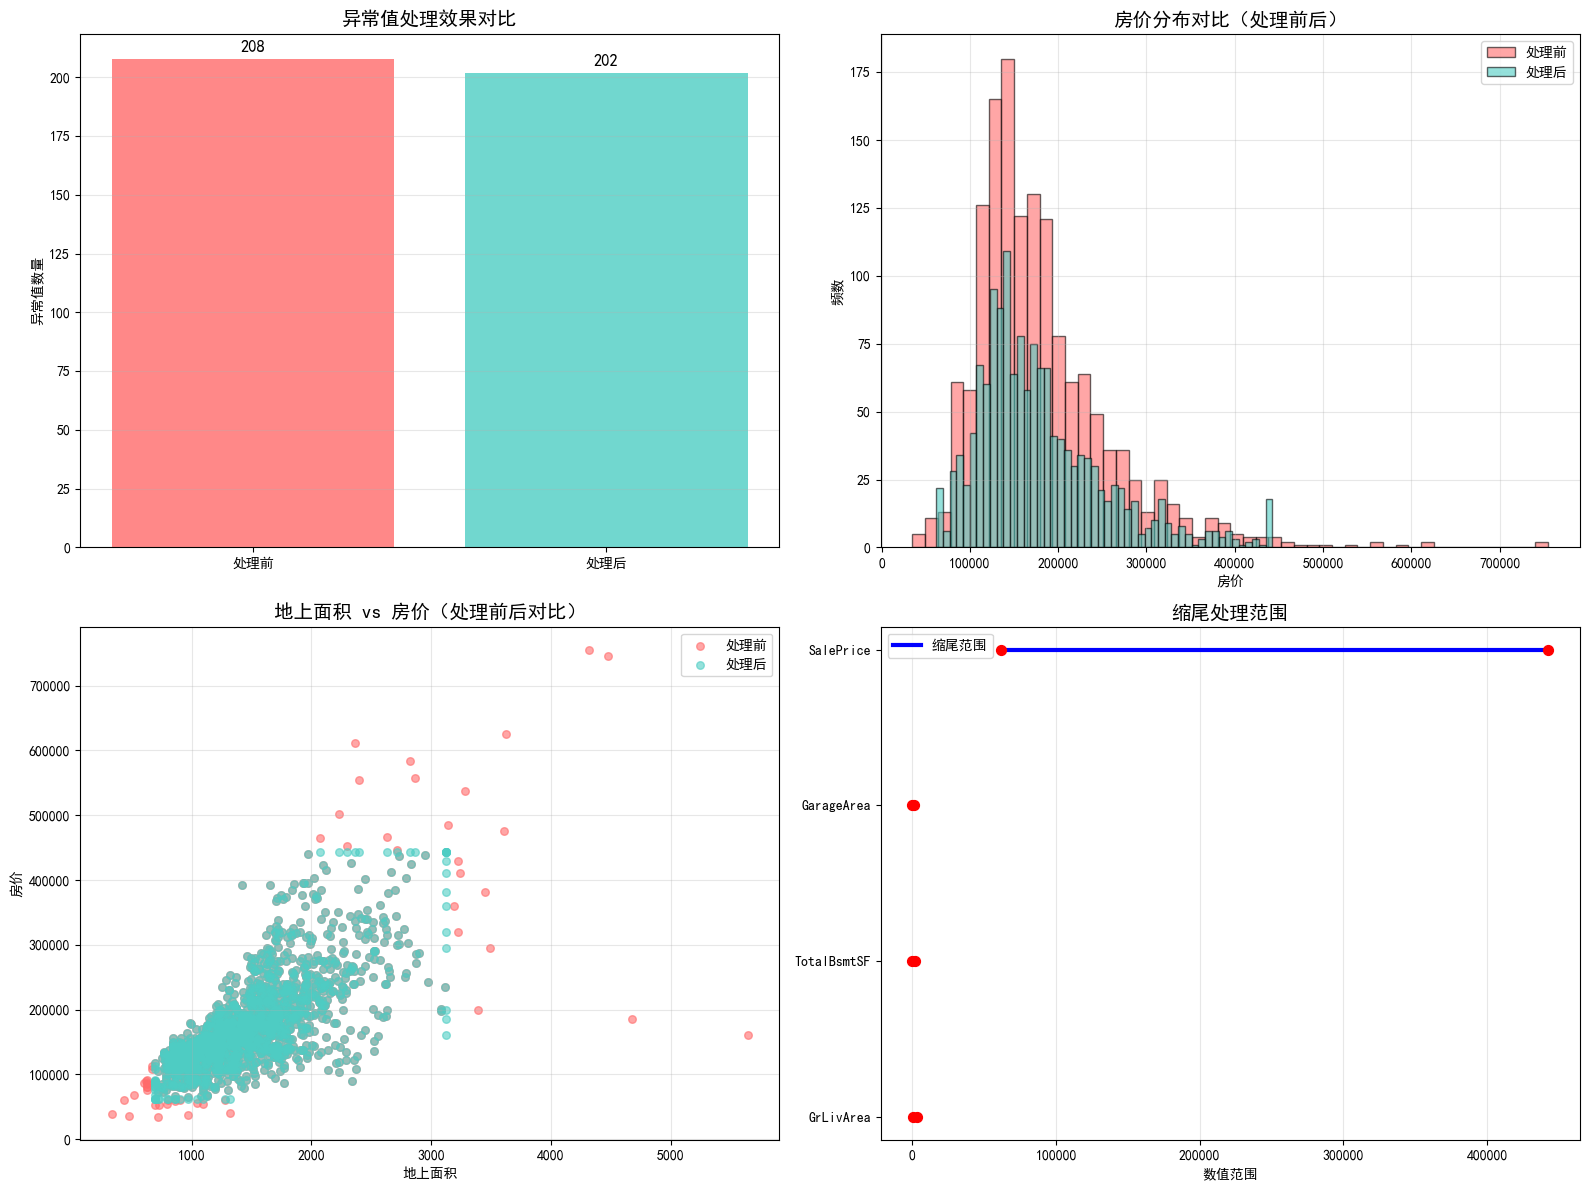


=== 异常值处理结果验证 ===
处理前异常值数量（IQR法）: 208
处理后异常值数量（IQR法）: 202
异常值减少比例: 2.88%

最终数据集形状: (1460, 81)
最终数据集缺失值数量: 0

=== 第三部分分析完成 ===
生成的图片文件:
6. 6_outliers_detection.png - 异常值检测分析
7. 7_outliers_treatment.png - 异常值处理效果


In [13]:
# 第三步：异常值检测与处理
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图片保存路径和格式
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# ==============================
# 重要：确保数据正确加载和预处理
# ==============================
# 检查是否已经加载了处理后的数据集
try:
    # 尝试使用已有的df_clean
    df_clean
    print("✓ 使用已有的df_clean数据集")
except NameError:
    # 如果df_clean不存在，需要重新加载和处理数据
    print("⚠️ df_clean未找到，正在重新加载和预处理数据...")
    
    # 1. 重新加载原始数据
    df = pd.read_csv('train.csv')
    
    # 2. 缺失值处理函数（与第二部分相同）
    def handle_missing_values(df):
        df_processed = df.copy()
        
        # 分类特征：NA表示"无此特征"，用'None'填充
        categorical_na_as_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
                                 'GarageType', 'GarageFinish', 'GarageQual', 
                                 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
        
        for feature in categorical_na_as_none:
            if feature in df_processed.columns:
                df_processed[feature] = df_processed[feature].fillna('None')
        
        # 数值特征：NA表示"面积/数量为0"，用0填充
        numerical_na_as_zero = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                               'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 
                               'GarageCars', 'GarageArea']
        
        for feature in numerical_na_as_zero:
            if feature in df_processed.columns:
                df_processed[feature] = df_processed[feature].fillna(0)
        
        # 特殊处理：LotFrontage用同小区中位数填充
        if 'LotFrontage' in df_processed.columns:
            df_processed['LotFrontage'] = df_processed.groupby('Neighborhood')['LotFrontage'].transform(
                lambda x: x.fillna(x.median())
            )
        
        # 其他分类特征：用众数填充
        for col in df_processed.select_dtypes(include=['object']).columns:
            if df_processed[col].isnull().any():
                mode_value = df_processed[col].mode()[0]
                df_processed[col] = df_processed[col].fillna(mode_value)
        
        return df_processed
    
    # 执行缺失值处理
    df_clean = handle_missing_values(df)
    print("✓ 数据重新加载和预处理完成")

# ==============================
# 开始异常值检测与处理
# ==============================
print("\n=== 第三步：异常值检测与处理 ===")

# 1. 筛选关键数值型特征
numerical_features = [
    'LotArea',          # 地块面积
    'GrLivArea',        # 地上居住面积
    'TotalBsmtSF',      # 地下室总面积
    'GarageArea',       # 车库面积
    '1stFlrSF',         # 一层面积
    '2ndFlrSF',         # 二层面积
    'BedroomAbvGr',     # 地上卧室数
    'FullBath',         # 全卫数量
    'SalePrice'         # 目标变量
]

# 从处理后的数据集（df_clean）中提取这些特征
df_numerical = df_clean[numerical_features].copy()
print(f"=== 待检测异常值的核心数值特征 ===")
print(f"特征列表: {numerical_features}")
print(f"数据形状: {df_numerical.shape}")

# 2. 异常值检测函数
def detect_outliers(df, features, method='iqr', z_threshold=3):
    outlier_indices = set()
    
    for feat in features:
        if method == 'iqr':
            Q1 = df[feat].quantile(0.25)
            Q3 = df[feat].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            feat_outliers = df[(df[feat] < lower_bound) | (df[feat] > upper_bound)].index
            outlier_indices.update(feat_outliers)
        
        elif method == 'zscore':
            feat_data = df[feat].dropna()
            z_scores = np.abs(stats.zscore(feat_data))
            feat_outliers = feat_data[z_scores > z_threshold].index
            outlier_indices.update(feat_outliers)
    
    return list(outlier_indices)

# 分别用两种方法检测异常值
iqr_outliers = detect_outliers(df_numerical, numerical_features, method='iqr')
zscore_outliers = detect_outliers(df_numerical, numerical_features, method='zscore', z_threshold=3)

# 统计异常值结果
print(f"\n=== 异常值检测结果 ===")
print(f"IQR法检测到异常值数量: {len(iqr_outliers)} (占总数据{len(iqr_outliers)/len(df_numerical)*100:.2f}%)")
print(f"Z-score法检测到异常值数量: {len(zscore_outliers)} (占总数据{len(zscore_outliers)/len(df_numerical)*100:.2f}%)")
common_outliers = list(set(iqr_outliers) & set(zscore_outliers))
print(f"两种方法共同检测到的异常值数量: {len(common_outliers)}")

# 查看部分异常值样本
if len(common_outliers) > 0:
    print(f"\n=== 部分异常值样本（房价相关） ===")
    abnormal_samples = df_numerical.loc[common_outliers[:5], ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']]
    print(abnormal_samples.round(2))

# 3. 可视化异常值
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 3.1 异常值检测方法对比
ax1 = axes[0, 0]
methods = ['IQR法', 'Z-score法', '共同检测']
outlier_counts = [len(iqr_outliers), len(zscore_outliers), len(common_outliers)]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = ax1.bar(methods, outlier_counts, color=colors, alpha=0.8)
ax1.set_title('异常值检测方法对比', fontsize=14)
ax1.set_ylabel('异常值数量')
ax1.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, outlier_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
             str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

# 3.2 箱线图展示异常值（选择几个重要特征）- 修复标签警告
ax2 = axes[0, 1]
important_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']
df_melted = pd.melt(df_numerical[important_features], var_name='特征', value_name='值')
box_plot = sns.boxplot(x='特征', y='值', data=df_melted, ax=ax2, color='lightblue', 
                      flierprops={'marker': 'o', 'markerfacecolor': 'orange', 'markersize': 5})
ax2.set_title('核心特征异常值箱线图', fontsize=14)
ax2.set_xlabel('特征')
ax2.set_ylabel('数值')
ax2.grid(True, alpha=0.3, axis='y')

# 正确设置x轴标签旋转 - 修复警告
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# 3.3 房价与地上面积散点图（标记异常值）
ax3 = axes[1, 0]
# 正常点
normal_points = df_numerical[~df_numerical.index.isin(common_outliers)]
ax3.scatter(normal_points['GrLivArea'], normal_points['SalePrice'], 
           alpha=0.6, color='steelblue', s=30, label='正常样本')
# 异常点
if len(common_outliers) > 0:
    abnormal_points = df_numerical.loc[common_outliers]
    ax3.scatter(abnormal_points['GrLivArea'], abnormal_points['SalePrice'], 
               color='red', s=80, marker='x', label='异常样本')
ax3.set_title('房价 vs 地上面积（异常值标记）', fontsize=14)
ax3.set_xlabel('地上面积 (GrLivArea)')
ax3.set_ylabel('房价 (SalePrice)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 3.4 异常值分布热力图
ax4 = axes[1, 1]
# 创建异常值标记矩阵
outlier_matrix = pd.DataFrame(index=df_numerical.index)
for feat in numerical_features:
    Q1 = df_numerical[feat].quantile(0.25)
    Q3 = df_numerical[feat].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_matrix[feat] = ((df_numerical[feat] < lower_bound) | (df_numerical[feat] > upper_bound)).astype(int)

# 只显示有异常值的行
outlier_rows = outlier_matrix[outlier_matrix.sum(axis=1) > 0]
sns.heatmap(outlier_rows.T, cmap='Reds', cbar=True, ax=ax4, 
           cbar_kws={'label': '异常值标记 (1=异常)'})
ax4.set_title('异常值分布热力图', fontsize=14)
ax4.set_xlabel('样本索引')
ax4.set_ylabel('特征')

plt.tight_layout()
plt.savefig('6_outliers_detection.png')
plt.show()  # 显示图片
plt.close()

# 4. 异常值处理（缩尾处理）
def handle_outliers_winsorize(df, features, lower_percentile=0.01, upper_percentile=0.99):
    df_processed = df.copy()
    winsorize_info = {}
    
    for feat in features:
        lower_bound = df_processed[feat].quantile(lower_percentile)
        upper_bound = df_processed[feat].quantile(upper_percentile)
        df_processed[feat] = np.clip(df_processed[feat], lower_bound, upper_bound)
        winsorize_info[feat] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
        print(f"处理特征 {feat}: 缩尾范围 [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    return df_processed, winsorize_info

# 对核心数值特征执行缩尾处理
df_numerical_no_outliers, winsorize_info = handle_outliers_winsorize(
    df_numerical, 
    numerical_features, 
    lower_percentile=0.01,
    upper_percentile=0.99
)

# 5. 验证异常值处理结果
post_iqr_outliers = detect_outliers(df_numerical_no_outliers, numerical_features, method='iqr')

# 可视化处理效果对比
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 5.1 异常值数量对比
ax1 = axes[0, 0]
categories = ['处理前', '处理后']
counts = [len(iqr_outliers), len(post_iqr_outliers)]
colors = ['#FF6B6B', '#4ECDC4']
bars = ax1.bar(categories, counts, color=colors, alpha=0.8)
ax1.set_title('异常值处理效果对比', fontsize=14)
ax1.set_ylabel('异常值数量')
ax1.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
             str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

# 5.2 房价分布对比
ax2 = axes[0, 1]
ax2.hist(df_numerical['SalePrice'], bins=50, alpha=0.6, label='处理前', color='#FF6B6B', edgecolor='black')
ax2.hist(df_numerical_no_outliers['SalePrice'], bins=50, alpha=0.6, label='处理后', color='#4ECDC4', edgecolor='black')
ax2.set_title('房价分布对比（处理前后）', fontsize=14)
ax2.set_xlabel('房价')
ax2.set_ylabel('频数')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 5.3 地上面积vs房价散点图对比（处理前后）
ax3 = axes[1, 0]
ax3.scatter(df_numerical['GrLivArea'], df_numerical['SalePrice'], 
           alpha=0.6, color='#FF6B6B', s=30, label='处理前')
ax3.scatter(df_numerical_no_outliers['GrLivArea'], df_numerical_no_outliers['SalePrice'], 
           alpha=0.6, color='#4ECDC4', s=30, label='处理后')
ax3.set_title('地上面积 vs 房价（处理前后对比）', fontsize=14)
ax3.set_xlabel('地上面积')
ax3.set_ylabel('房价')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 5.4 缩尾处理范围展示
ax4 = axes[1, 1]
features_for_plot = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']
x_pos = np.arange(len(features_for_plot))
lower_bounds = [winsorize_info[feat]['lower_bound'] for feat in features_for_plot]
upper_bounds = [winsorize_info[feat]['upper_bound'] for feat in features_for_plot]

# 绘制范围线
for i, (feat, lower, upper) in enumerate(zip(features_for_plot, lower_bounds, upper_bounds)):
    ax4.plot([lower, upper], [i, i], 'b-', linewidth=3, label='缩尾范围' if i == 0 else "")
    ax4.scatter(lower, i, color='red', s=50, zorder=5)
    ax4.scatter(upper, i, color='red', s=50, zorder=5)

ax4.set_yticks(x_pos)
ax4.set_yticklabels(features_for_plot)
ax4.set_xlabel('数值范围')
ax4.set_title('缩尾处理范围', fontsize=14)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('7_outliers_treatment.png')
plt.show()  # 显示图片
plt.close()

# 6. 合并处理后的特征到原数据集
df_no_outliers = df_clean.copy()
df_no_outliers[numerical_features] = df_numerical_no_outliers

print(f"\n=== 异常值处理结果验证 ===")
print(f"处理前异常值数量（IQR法）: {len(iqr_outliers)}")
print(f"处理后异常值数量（IQR法）: {len(post_iqr_outliers)}")
print(f"异常值减少比例: {((len(iqr_outliers)-len(post_iqr_outliers))/len(iqr_outliers)*100):.2f}%")
print(f"\n最终数据集形状: {df_no_outliers.shape}")
print(f"最终数据集缺失值数量: {df_no_outliers.isnull().sum().sum()}")

print("\n=== 第三部分分析完成 ===")
print("生成的图片文件:")
print("6. 6_outliers_detection.png - 异常值检测分析")
print("7. 7_outliers_treatment.png - 异常值处理效果")

=== 核心数值特征相关性矩阵（数值版） ===
              LotArea  GrLivArea  TotalBsmtSF  GarageArea  1stFlrSF  2ndFlrSF  \
LotArea         1.000      0.394        0.331       0.301     0.417     0.105   
GrLivArea       0.394      1.000        0.406       0.467     0.530     0.690   
TotalBsmtSF     0.331      0.406        1.000       0.484     0.804    -0.211   
GarageArea      0.301      0.467        0.484       1.000     0.487     0.137   
1stFlrSF        0.417      0.530        0.804       0.487     1.000    -0.236   
2ndFlrSF        0.105      0.690       -0.211       0.137    -0.236     1.000   
BedroomAbvGr    0.239      0.547        0.051       0.084     0.131     0.516   
FullBath        0.198      0.649        0.338       0.423     0.393     0.416   
SalePrice       0.387      0.722        0.647       0.648     0.628     0.302   

              BedroomAbvGr  FullBath  SalePrice  
LotArea              0.239     0.198      0.387  
GrLivArea            0.547     0.649      0.722  
TotalBsmtSF   

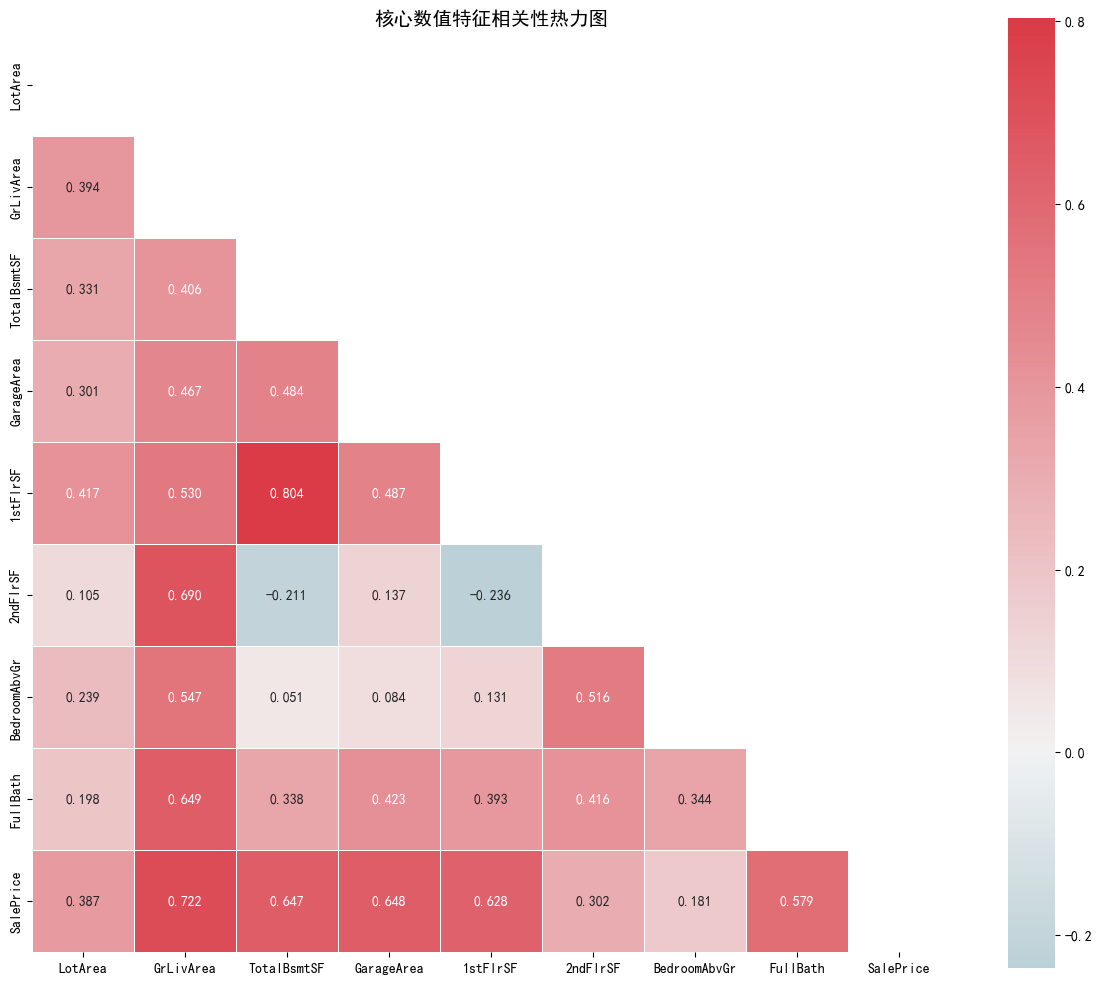


=== 与房价（SalePrice）相关性排序 ===
SalePrice       1.000
GrLivArea       0.722
GarageArea      0.648
TotalBsmtSF     0.647
1stFlrSF        0.628
FullBath        0.579
LotArea         0.387
2ndFlrSF        0.302
BedroomAbvGr    0.181
Name: SalePrice, dtype: float64

=== Top3相关特征：['GrLivArea', 'GarageArea', 'TotalBsmtSF'] ===


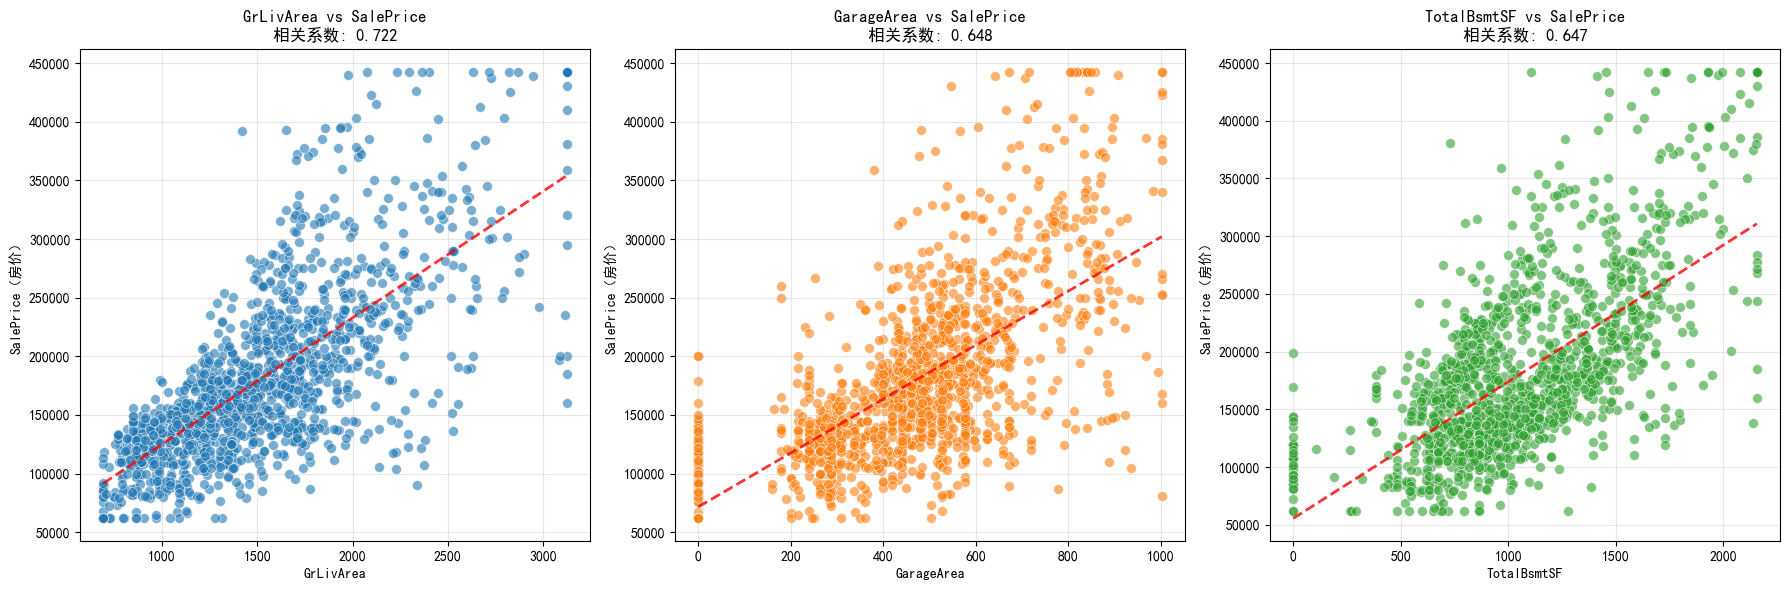


=== 多重共线性检测（VIF） ===
             特征    VIF值
1     GrLivArea  642.32
4      1stFlrSF  422.02
5      2ndFlrSF   79.18
2   TotalBsmtSF   22.93
7      FullBath   16.68
6  BedroomAbvGr   14.64
3    GarageArea    9.53
0       LotArea    6.52
注：VIF>10表示共线性严重，建议删除冗余特征


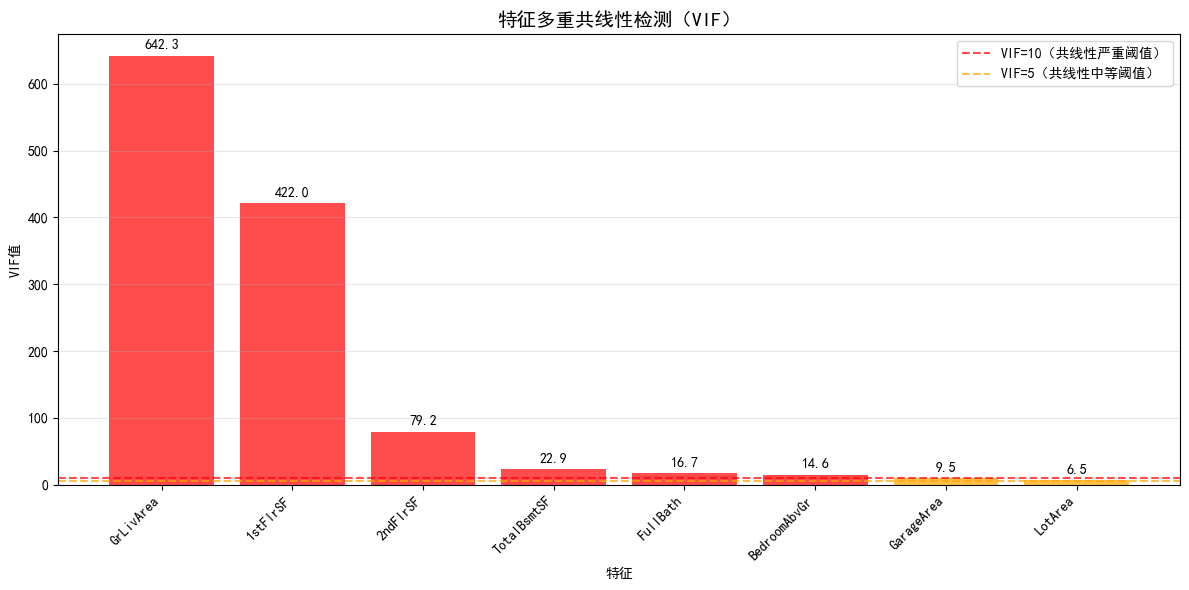


=== 高共线性特征处理 ===
VIF>10的特征: ['GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'FullBath', 'BedroomAbvGr']
删除冗余特征: GrLivArea（与SalePrice相关性0.722）
删除冗余特征: 1stFlrSF（与TotalBsmtSF相关性0.804）

=== 最终筛选后的核心特征 ===
['LotArea', 'TotalBsmtSF', 'GarageArea', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'SalePrice']


<Figure size 1000x600 with 0 Axes>

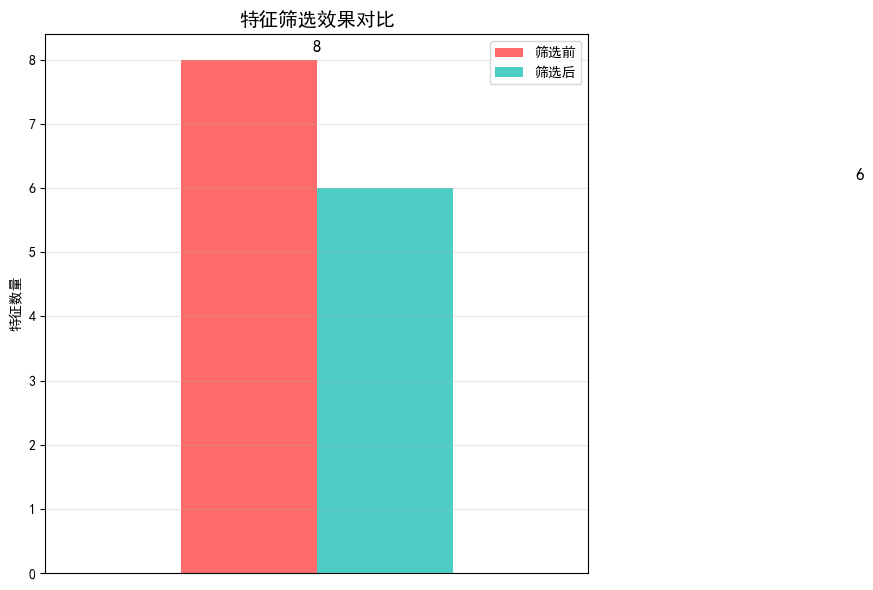


=== 筛选后数据集信息 ===
数据形状: (1460, 7)
特征列表: ['LotArea', 'TotalBsmtSF', 'GarageArea', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'SalePrice']

=== 第四部分分析完成 ===
生成的图片文件:
8. 8_correlation_heatmap.png - 相关性热力图
9. 9_top3_features_scatter.png - Top3特征散点图
10. 10_vif_analysis.png - VIF共线性分析
11. 11_feature_selection_result.png - 特征筛选结果


In [14]:
# 第四步：特征间的相关性分析（完整版）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图片保存路径和格式
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# 1. 核心数值特征（与房价强相关的基础特征）
core_numerical_feats = [
    'LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 
    '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'SalePrice'
]

# 2. 计算核心数值特征的相关性矩阵并打印
print("=== 核心数值特征相关性矩阵（数值版） ===")
core_corr_matrix = df_no_outliers[core_numerical_feats].corr()
print(core_corr_matrix.round(3))

# 3. 可视化相关性热力图
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(core_corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    core_corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt='.3f',  # 显示3位小数，更精确
    cmap=cmap, 
    center=0, 
    square=True, 
    linewidths=.5
)
plt.title('核心数值特征相关性热力图', fontsize=14)
plt.tight_layout()
plt.savefig('8_correlation_heatmap.png')
plt.show()  # 显示图片
plt.close()

# 4. 计算与房价的相关性并排序
saleprice_corr = core_corr_matrix['SalePrice'].sort_values(ascending=False, key=abs)
print(f"\n=== 与房价（SalePrice）相关性排序 ===")
print(saleprice_corr.round(3))

# 5. 散点图：展示Top3相关特征与房价的关系
top3_corr_feats = saleprice_corr.head(4).index[1:4].tolist()  # 排除SalePrice自身
print(f"\n=== Top3相关特征：{top3_corr_feats} ===")

plt.figure(figsize=(18, 6))
for i, feat in enumerate(top3_corr_feats):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df_no_outliers[feat], y=df_no_outliers['SalePrice'], 
                   alpha=0.6, color=f'C{i}', s=50)
    
    # 添加线性趋势线
    z = np.polyfit(df_no_outliers[feat], df_no_outliers['SalePrice'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_no_outliers[feat].min(), df_no_outliers[feat].max(), 100)
    plt.plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8)
    
    # 添加统计信息
    corr_coef = core_corr_matrix.loc[feat, 'SalePrice']
    plt.title(f'{feat} vs SalePrice\n相关系数: {corr_coef:.3f}', fontsize=12)
    plt.xlabel(feat)
    plt.ylabel('SalePrice（房价）')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('9_top3_features_scatter.png')
plt.show()  # 显示图片
plt.close()

# 6. 多重共线性检测（VIF）
print(f"\n=== 多重共线性检测（VIF） ===")
df_vif = df_no_outliers[core_numerical_feats].drop('SalePrice', axis=1)
vif_data = pd.DataFrame()
vif_data['特征'] = df_vif.columns
vif_data['VIF值'] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]
vif_data = vif_data.sort_values('VIF值', ascending=False)
print(vif_data.round(2))
print(f"注：VIF>10表示共线性严重，建议删除冗余特征")

# 7. 可视化VIF结果
plt.figure(figsize=(12, 6))
colors = ['red' if vif > 10 else 'orange' if vif > 5 else 'green' for vif in vif_data['VIF值']]
bars = plt.bar(vif_data['特征'], vif_data['VIF值'], color=colors, alpha=0.7)
plt.title('特征多重共线性检测（VIF）', fontsize=14)
plt.xlabel('特征')
plt.ylabel('VIF值')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# 添加VIF阈值线
plt.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='VIF=10（共线性严重阈值）')
plt.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='VIF=5（共线性中等阈值）')
plt.legend()

# 添加数值标签
for bar, vif in zip(bars, vif_data['VIF值']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(vif_data['VIF值']) * 0.01,
             f'{vif:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('10_vif_analysis.png')
plt.show()  # 显示图片
plt.close()

# 8. 特征筛选：去除高共线性特征
high_vif_threshold = 10
high_vif_features = vif_data[vif_data['VIF值'] > high_vif_threshold]['特征'].tolist()
print(f"\n=== 高共线性特征处理 ===")
print(f"VIF>10的特征: {high_vif_features}")

if high_vif_features:
    redundant_features = []
    for feat in high_vif_features:
        # 找出与该特征高度相关的其他特征
        correlated_feats = [f for f in core_numerical_feats if f != feat and 
                           abs(core_corr_matrix.loc[feat, f]) > 0.7]
        
        if correlated_feats:
            # 比较相关性，保留与房价相关性更高的特征
            feat_corr = core_corr_matrix.loc[feat, 'SalePrice']
            for corr_feat in correlated_feats:
                corr_feat_corr = core_corr_matrix.loc[corr_feat, 'SalePrice']
                if feat_corr < corr_feat_corr and feat not in redundant_features:
                    redundant_features.append(feat)
                    print(f"删除冗余特征: {feat}（与{corr_feat}相关性{core_corr_matrix.loc[feat, corr_feat]:.3f}）")
    
    # 得到最终筛选后的特征
    selected_feats = [f for f in core_numerical_feats if f not in redundant_features]
else:
    selected_feats = core_numerical_feats

print(f"\n=== 最终筛选后的核心特征 ===")
print(selected_feats)

# 9. 可视化特征筛选结果
plt.figure(figsize=(10, 6))

# 创建对比数据
before_after = pd.DataFrame({
    '筛选前': [len(core_numerical_feats) - 1],  # 减去SalePrice
    '筛选后': [len(selected_feats) - 1]
})

# 绘制对比柱状图
ax = before_after.plot(kind='bar', figsize=(10, 6), color=['#FF6B6B', '#4ECDC4'])
plt.title('特征筛选效果对比', fontsize=14)
plt.ylabel('特征数量')
plt.xticks([])  # 隐藏x轴标签
plt.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for i, v in enumerate(before_after.iloc[0]):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('11_feature_selection_result.png')
plt.show()  # 显示图片
plt.close()

# 10. 保存筛选后的数据集
df_selected = df_no_outliers[selected_feats].copy()
print(f"\n=== 筛选后数据集信息 ===")
print(f"数据形状: {df_selected.shape}")
print(f"特征列表: {selected_feats}")

print("\n=== 第四部分分析完成 ===")
print("生成的图片文件:")
print("8. 8_correlation_heatmap.png - 相关性热力图")
print("9. 9_top3_features_scatter.png - Top3特征散点图")
print("10. 10_vif_analysis.png - VIF共线性分析")
print("11. 11_feature_selection_result.png - 特征筛选结果")

=== 房价标准化前的基本统计 ===
count      1460.00
mean     179926.42
std       74052.66
min       61815.97
25%      129975.00
50%      163000.00
75%      214000.00
max      442567.01
Name: SalePrice, dtype: float64

=== 标准化方法比较 ===
           方法           均值         标准差      偏度         最小值          最大值
0        原始数据  179926.4162  74052.6589  1.2714  61815.9700  442567.0100
1  Z-score标准化       0.0000      1.0000  1.2714     -1.5955       3.5479
2  Min-Max标准化       0.3102      0.1944  1.2714      0.0000       1.0000
3   Robust标准化       0.2014      0.8810  1.2714     -1.2042       3.3272
4        对数变换      12.0242      0.3863  0.1609     11.0319      13.0003
5  对数+Z-score      -0.0000      1.0000  0.1609     -2.5693       2.5274


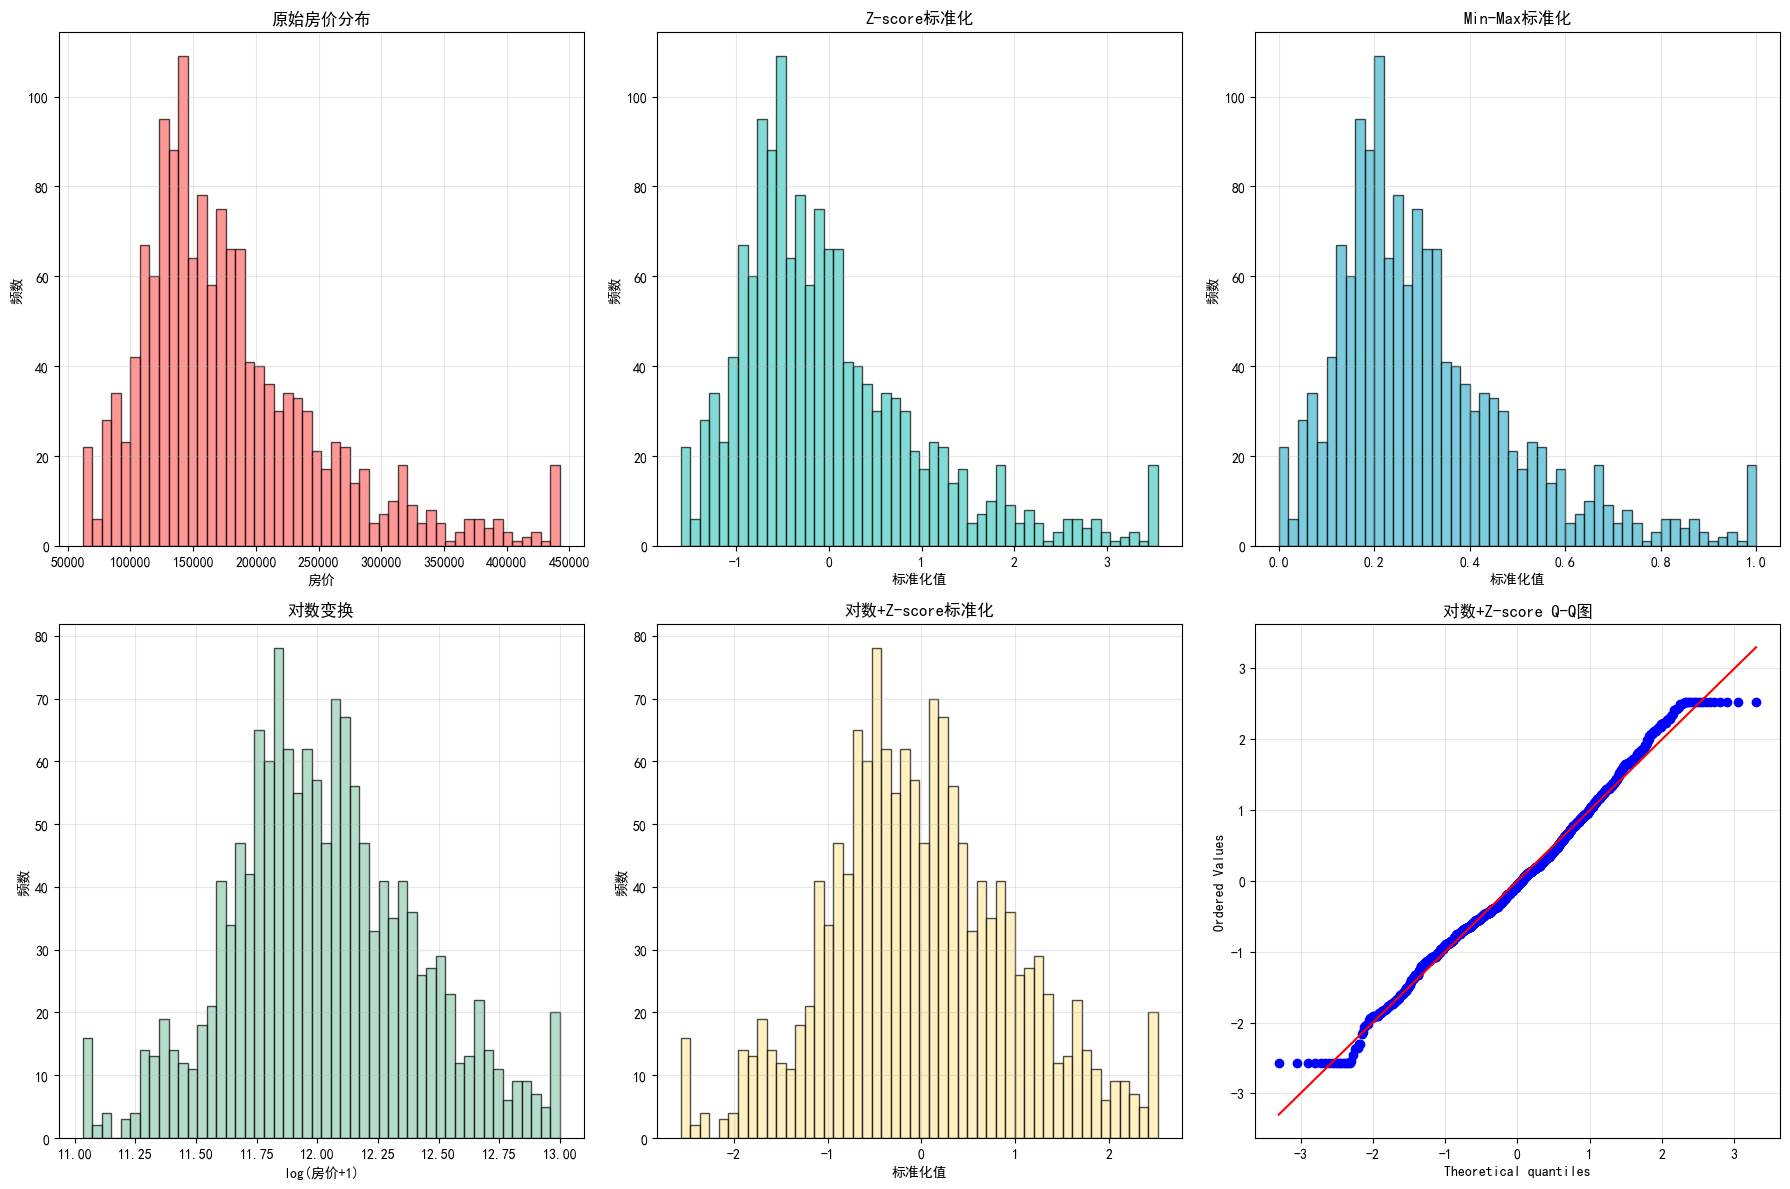

C:\Users\Daniel Liu\AppData\Local\Temp\ipykernel_28536\3073415710.py:155: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(methods, rotation=45, ha='right')
C:\Users\Daniel Liu\AppData\Local\Temp\ipykernel_28536\3073415710.py:194: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(methods, rotation=45, ha='right')


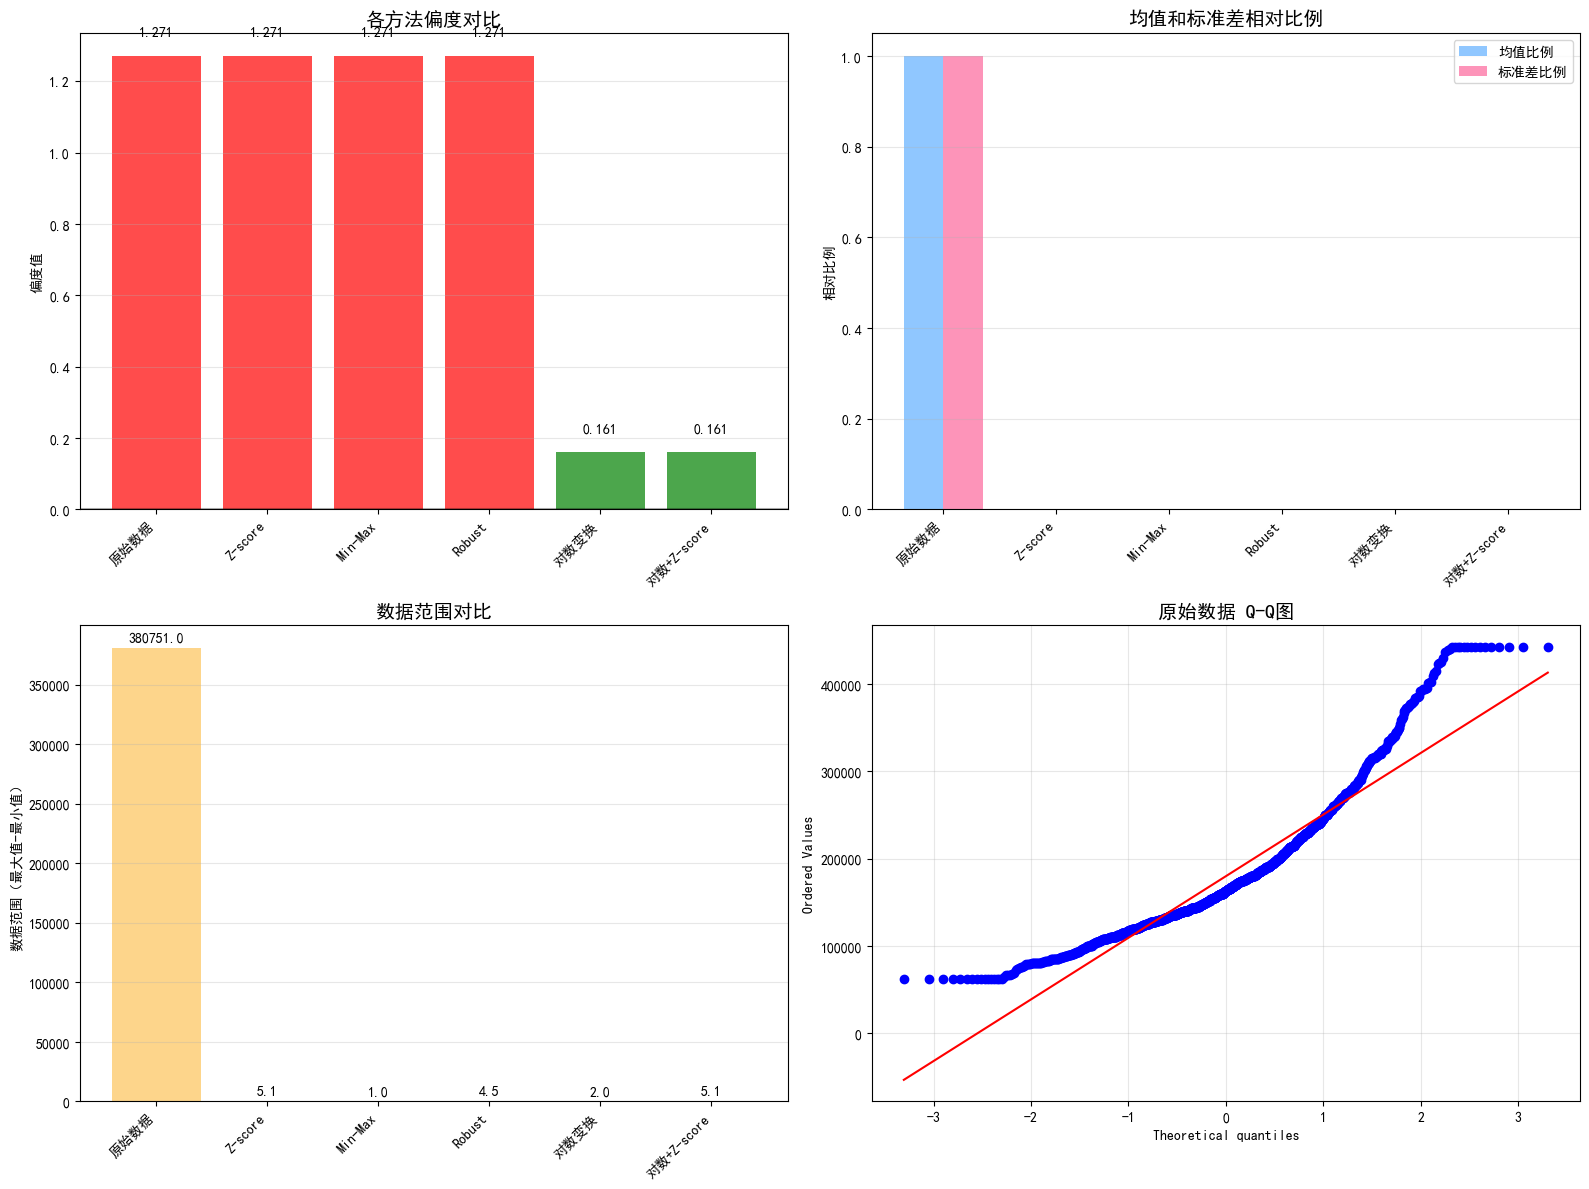


=== 推荐标准化方法：对数+Z-score ===
理由：
1. 偏度从 1.271 降至 0.161
2. 数据更接近正态分布（Q-Q图显示点更接近直线）
3. 保留了房价的相对关系，同时消除了量级影响
4. 对异常值的鲁棒性更好

=== 标准化完成 ===
最终数据集形状: (1460, 11)
新增标准化列: SalePrice_zscore, SalePrice_minmax, SalePrice_log, SalePrice_final

=== 第五部分分析完成 ===
生成的图片文件:
12. 12_standardization_comparison.png - 标准化方法分布图
13. 13_standardization_statistics.png - 标准化统计对比图


In [17]:
# 第五步：对房价（SalePrice）进行标准化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy import stats

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图片保存路径和格式
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# 1. 获取筛选后的数据集（来自第四步的结果）
# 如果第四步的df_selected还在内存中，可以直接使用
# 否则重新加载：
# df_selected = df_no_outliers[['LotArea', 'TotalBsmtSF', 'GarageArea', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'SalePrice']]

print("=== 房价标准化前的基本统计 ===")
print(df_selected['SalePrice'].describe().round(2))

# 2. 多种标准化方法比较
saleprice_original = df_selected['SalePrice'].copy()

# 方法1：Z-score标准化（标准正态分布）
scaler_z = StandardScaler()
saleprice_zscore = scaler_z.fit_transform(saleprice_original.values.reshape(-1, 1)).flatten()

# 方法2：Min-Max标准化（[0,1]区间）
scaler_minmax = MinMaxScaler()
saleprice_minmax = scaler_minmax.fit_transform(saleprice_original.values.reshape(-1, 1)).flatten()

# 方法3：Robust标准化（对异常值不敏感）
scaler_robust = RobustScaler()
saleprice_robust = scaler_robust.fit_transform(saleprice_original.values.reshape(-1, 1)).flatten()

# 方法4：对数变换（改善分布偏度）
saleprice_log = np.log1p(saleprice_original)  # log1p = log(1+x)，避免log(0)

# 方法5：对数+Z-score标准化（推荐）
scaler_log_z = StandardScaler()
saleprice_log_zscore = scaler_log_z.fit_transform(saleprice_log.values.reshape(-1, 1)).flatten()

# 3. 统计指标比较
standardization_comparison = pd.DataFrame({
    '方法': ['原始数据', 'Z-score标准化', 'Min-Max标准化', 'Robust标准化', '对数变换', '对数+Z-score'],
    '均值': [
        saleprice_original.mean(),
        saleprice_zscore.mean(),
        saleprice_minmax.mean(),
        saleprice_robust.mean(),
        saleprice_log.mean(),
        saleprice_log_zscore.mean()
    ],
    '标准差': [
        saleprice_original.std(),
        saleprice_zscore.std(),
        saleprice_minmax.std(),
        saleprice_robust.std(),
        saleprice_log.std(),
        saleprice_log_zscore.std()
    ],
    '偏度': [
        stats.skew(saleprice_original),
        stats.skew(saleprice_zscore),
        stats.skew(saleprice_minmax),
        stats.skew(saleprice_robust),
        stats.skew(saleprice_log),
        stats.skew(saleprice_log_zscore)
    ],
    '最小值': [
        saleprice_original.min(),
        saleprice_zscore.min(),
        saleprice_minmax.min(),
        saleprice_robust.min(),
        saleprice_log.min(),
        saleprice_log_zscore.min()
    ],
    '最大值': [
        saleprice_original.max(),
        saleprice_zscore.max(),
        saleprice_minmax.max(),
        saleprice_robust.max(),
        saleprice_log.max(),
        saleprice_log_zscore.max()
    ]
})

print(f"\n=== 标准化方法比较 ===")
print(standardization_comparison.round(4))

# 4. 可视化比较 - 分布图
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 原始数据
axes[0, 0].hist(saleprice_original, bins=50, edgecolor='black', alpha=0.7, color='#FF6B6B')
axes[0, 0].set_title('原始房价分布', fontsize=12)
axes[0, 0].set_xlabel('房价')
axes[0, 0].set_ylabel('频数')
axes[0, 0].grid(True, alpha=0.3)

# Z-score标准化
axes[0, 1].hist(saleprice_zscore, bins=50, edgecolor='black', alpha=0.7, color='#4ECDC4')
axes[0, 1].set_title('Z-score标准化', fontsize=12)
axes[0, 1].set_xlabel('标准化值')
axes[0, 1].set_ylabel('频数')
axes[0, 1].grid(True, alpha=0.3)

# Min-Max标准化
axes[0, 2].hist(saleprice_minmax, bins=50, edgecolor='black', alpha=0.7, color='#45B7D1')
axes[0, 2].set_title('Min-Max标准化', fontsize=12)
axes[0, 2].set_xlabel('标准化值')
axes[0, 2].set_ylabel('频数')
axes[0, 2].grid(True, alpha=0.3)

# 对数变换
axes[1, 0].hist(saleprice_log, bins=50, edgecolor='black', alpha=0.7, color='#96CEB4')
axes[1, 0].set_title('对数变换', fontsize=12)
axes[1, 0].set_xlabel('log(房价+1)')
axes[1, 0].set_ylabel('频数')
axes[1, 0].grid(True, alpha=0.3)

# 对数+Z-score
axes[1, 1].hist(saleprice_log_zscore, bins=50, edgecolor='black', alpha=0.7, color='#FFEAA7')
axes[1, 1].set_title('对数+Z-score标准化', fontsize=12)
axes[1, 1].set_xlabel('标准化值')
axes[1, 1].set_ylabel('频数')
axes[1, 1].grid(True, alpha=0.3)

# Q-Q图：检验正态性
from scipy.stats import probplot
probplot(saleprice_log_zscore, dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('对数+Z-score Q-Q图', fontsize=12)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('12_standardization_comparison.png')
plt.show()  # 显示图片
plt.close()

# 5. 可视化比较 - 统计指标对比
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 5.1 偏度对比
ax1 = axes[0, 0]
methods = ['原始数据', 'Z-score', 'Min-Max', 'Robust', '对数变换', '对数+Z-score']
skewness_values = standardization_comparison['偏度'].values
colors = ['red' if s > 1 else 'orange' if s > 0.5 else 'green' for s in skewness_values]
bars = ax1.bar(methods, skewness_values, color=colors, alpha=0.7)
ax1.set_title('各方法偏度对比', fontsize=14)
ax1.set_ylabel('偏度值')
ax1.set_xticklabels(methods, rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

for bar, value in zip(bars, skewness_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05 if height > 0 else height - 0.2,
             f'{value:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

# 5.2 均值和标准差对比
ax2 = axes[0, 1]
x = np.arange(len(methods))
width = 0.35
means = standardization_comparison['均值'].values
stds = standardization_comparison['标准差'].values

# 由于原始数据量级太大，使用相对比例显示
means_normalized = means / means[0]  # 相对于原始数据的均值比例
stds_normalized = stds / stds[0]    # 相对于原始数据的标准差比例

bars1 = ax2.bar(x - width/2, means_normalized, width, label='均值比例', alpha=0.8, color='#74B9FF')
bars2 = ax2.bar(x + width/2, stds_normalized, width, label='标准差比例', alpha=0.8, color='#FD79A8')

ax2.set_title('均值和标准差相对比例', fontsize=14)
ax2.set_ylabel('相对比例')
ax2.set_xticks(x)
ax2.set_xticklabels(methods, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 5.3 数据范围对比
ax3 = axes[1, 0]
min_values = standardization_comparison['最小值'].values
max_values = standardization_comparison['最大值'].values
ranges = max_values - min_values

bars = ax3.bar(methods, ranges, color='#FDCB6E', alpha=0.8)
ax3.set_title('数据范围对比', fontsize=14)
ax3.set_ylabel('数据范围（最大值-最小值）')
ax3.set_xticklabels(methods, rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, ranges):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + max(ranges) * 0.01,
             f'{value:.1f}', ha='center', va='bottom', fontsize=10)

# 5.4 推荐方法的效果展示
ax4 = axes[1, 1]
# 原始数据的Q-Q图
probplot(saleprice_original, dist="norm", plot=ax4)
ax4.set_title('原始数据 Q-Q图', fontsize=14)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('13_standardization_statistics.png')
plt.show()  # 显示图片
plt.close()

# 6. 选择最佳标准化方法
# 基于偏度、正态性和业务解释性，推荐使用对数+Z-score标准化
print(f"\n=== 推荐标准化方法：对数+Z-score ===")
print(f"理由：")
print(f"1. 偏度从 {stats.skew(saleprice_original):.3f} 降至 {stats.skew(saleprice_log_zscore):.3f}")
print(f"2. 数据更接近正态分布（Q-Q图显示点更接近直线）")
print(f"3. 保留了房价的相对关系，同时消除了量级影响")
print(f"4. 对异常值的鲁棒性更好")

# 7. 保存标准化结果
df_standardized = df_selected.copy()
df_standardized['SalePrice_zscore'] = saleprice_zscore
df_standardized['SalePrice_minmax'] = saleprice_minmax
df_standardized['SalePrice_log'] = saleprice_log
df_standardized['SalePrice_final'] = saleprice_log_zscore  # 最终推荐使用的标准化结果

print(f"\n=== 标准化完成 ===")
print(f"最终数据集形状: {df_standardized.shape}")
print(f"新增标准化列: SalePrice_zscore, SalePrice_minmax, SalePrice_log, SalePrice_final")

# 8. 保存最终数据集
# df_standardized.to_csv('house_price_standardized.csv', index=False)
# print(f"\n✓ 标准化数据集已保存为 'house_price_standardized.csv'")

print("\n=== 第五部分分析完成 ===")
print("生成的图片文件:")
print("12. 12_standardization_comparison.png - 标准化方法分布图")
print("13. 13_standardization_statistics.png - 标准化统计对比图")

=== 房价离散化前的基本统计 ===
count      1460.00
mean     179926.42
std       74052.66
min       61815.97
25%      129975.00
50%      163000.00
75%      214000.00
max      442567.01
Name: SalePrice, dtype: float64

=== 各离散化方法分布统计 ===
                         等宽离散化  等频离散化  业务逻辑离散化  聚类离散化
中档型($15-20万)                 0      0      414      0
分位数1($61,816-$124,000)       0    295        0      0
分位数2($124,000-$147,000)      0    294        0      0
分位数3($147,000-$179,280)      0    287        0      0
分位数4($179,280-$230,000)      0    295        0      0
分位数5($230,000-$442,567)      0    289        0      0
区间1($61,816-$137,966)      465      0        0      0
区间2($137,966-$214,116)     633      0        0      0
区间3($214,116-$290,267)     241      0        0      0
区间4($290,267-$366,417)      71      0        0      0
区间5($366,417-$442,567)      35      0        0      0
实惠型($10-15万)                 0      0      496      0
经济型(<$10万)                   0      0      123      0
聚类1($61,816-$141,000

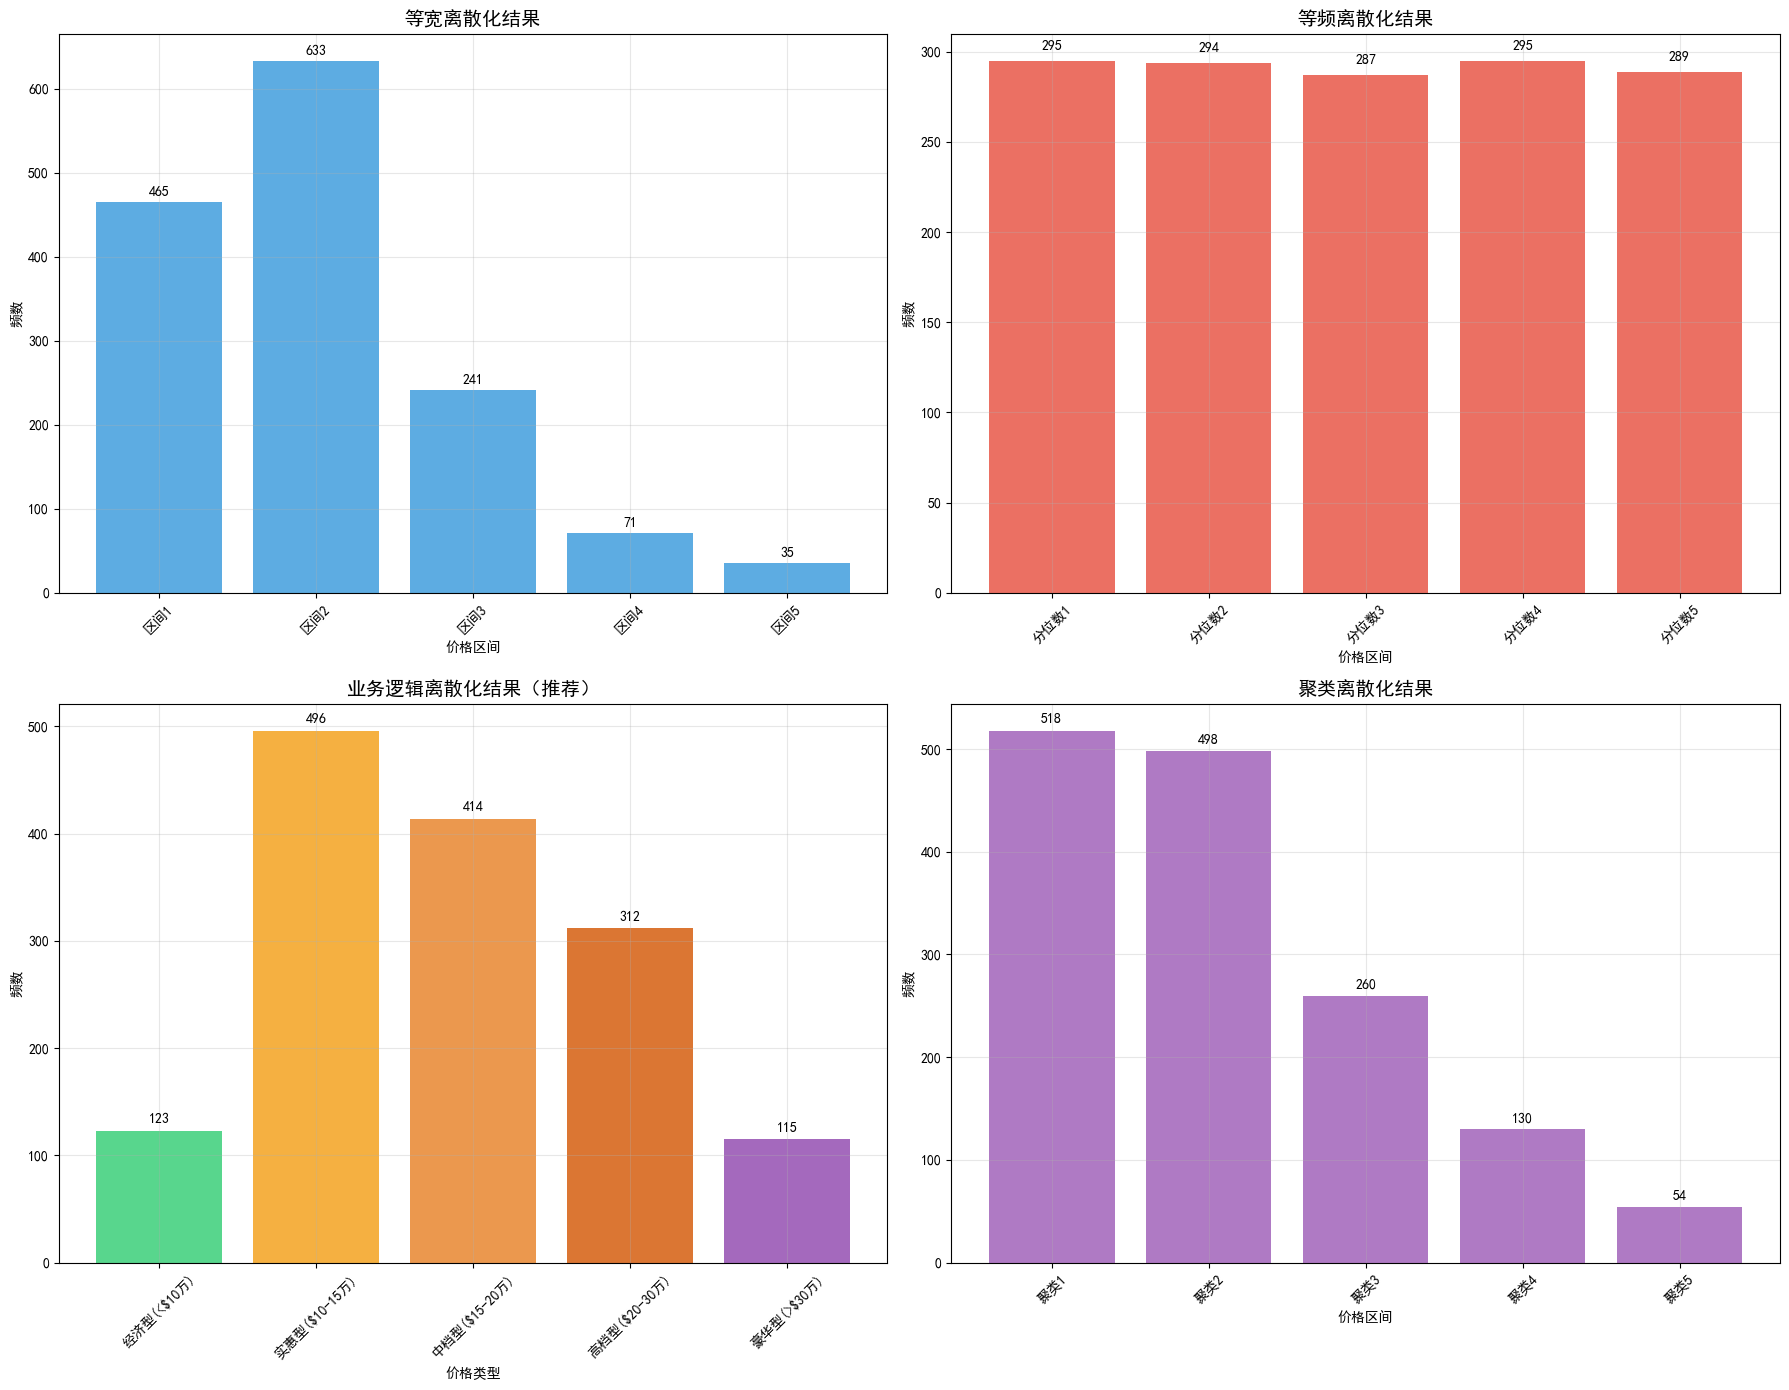

C:\Users\Daniel Liu\AppData\Local\Temp\ipykernel_28536\585079607.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(methods, rotation=45, ha='right')


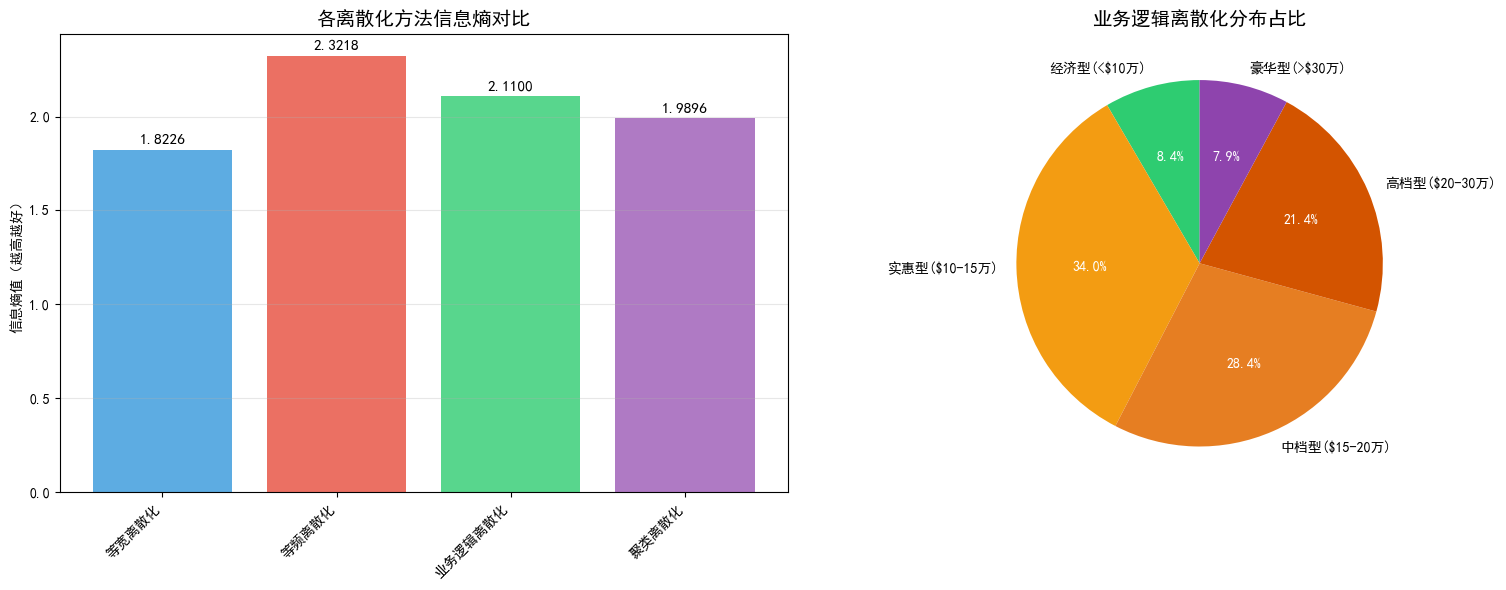

C:\Users\Daniel Liu\AppData\Local\Temp\ipykernel_28536\585079607.py:232: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(bl_stats['价格类型'], rotation=45, ha='right')


<Figure size 1200x800 with 0 Axes>

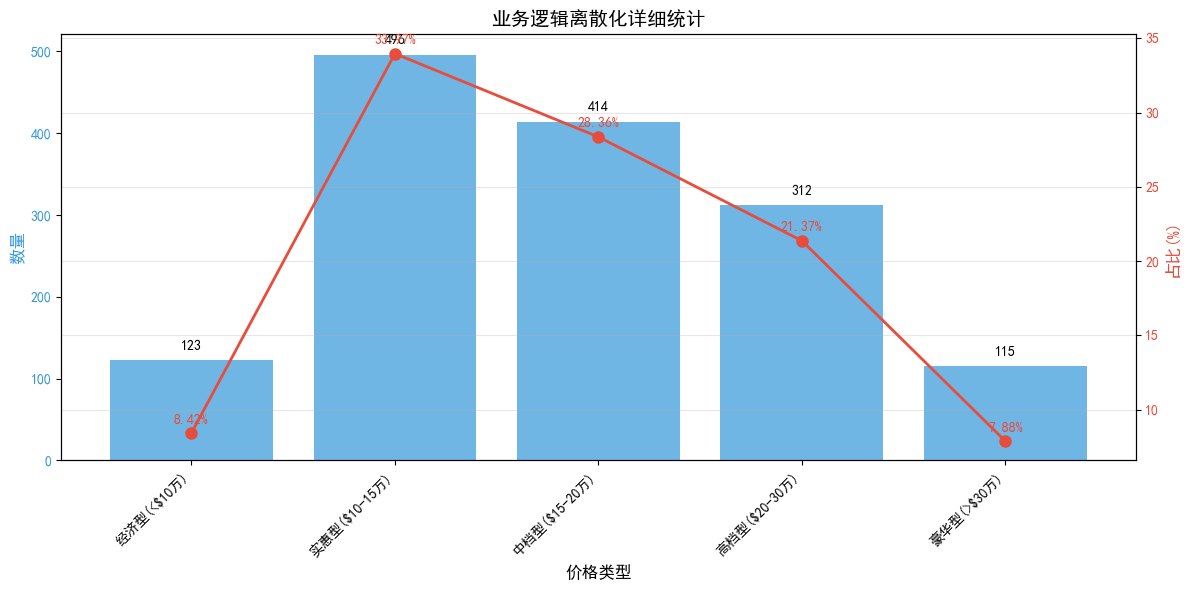


=== 推荐离散化方法：业务逻辑离散化 ===
理由：
1. 符合房地产市场的实际分类习惯
2. 各类别分布相对均匀，信息熵较高：2.1100
3. 类别标签具有明确的业务含义，便于解释和决策
4. 覆盖了从经济型到豪华型的完整价格区间

=== 离散化完成 ===
最终数据集形状: (1460, 15)
新增离散化列: Price_EqualWidth, Price_EqualFreq, Price_BusinessLogic, Price_Cluster

=== 业务逻辑离散化详细统计 ===
           价格类型   数量  占比(%)
0    经济型(<$10万)  123   8.42
1  实惠型($10-15万)  496  33.97
2  中档型($15-20万)  414  28.36
3  高档型($20-30万)  312  21.37
4    豪华型(>$30万)  115   7.88

=== 第六部分分析完成 ===
生成的图片文件:
14. 14_discretization_comparison.png - 离散化方法对比图
15. 15_discretization_visualization.png - 离散化效果可视化
16. 16_business_logic_distribution.png - 业务逻辑离散化详细统计


In [20]:
# 第六步：根据price属性进行离散化（修正版）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
import warnings

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图片保存路径和格式
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# 忽略KMeans的特定警告
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# 1. 使用原始房价进行离散化（更具业务意义）
saleprice_original = df_standardized['SalePrice'].copy()

print("=== 房价离散化前的基本统计 ===")
print(saleprice_original.describe().round(2))

# 2. 方法1：等宽离散化（Equal Width Binning）
def equal_width_binning(data, n_bins=5):
    min_val = data.min()
    max_val = data.max()
    bin_width = (max_val - min_val) / n_bins
    bins = [min_val + i * bin_width for i in range(n_bins + 1)]
    labels = [f'区间{i+1}(${bins[i]:,.0f}-${bins[i+1]:,.0f})' for i in range(n_bins)]
    return pd.cut(data, bins=bins, labels=labels, include_lowest=True)

# 方法2：等频离散化（Equal Frequency Binning）
def equal_frequency_binning(data, n_bins=5):
    quantiles = [data.quantile(i/n_bins) for i in range(n_bins + 1)]
    # 处理可能的重复分位数
    quantiles = sorted(list(set(quantiles)))
    if len(quantiles) < n_bins + 1:
        quantiles = [data.quantile(i/n_bins) for i in range(n_bins + 1)]
    
    labels = [f'分位数{i+1}(${quantiles[i]:,.0f}-${quantiles[i+1]:,.0f})' 
              for i in range(len(quantiles)-1)]
    return pd.cut(data, bins=quantiles, labels=labels, include_lowest=True)

# 方法3：基于业务逻辑的离散化（推荐）
def business_logic_binning(data):
    # 根据房地产市场的常见分类
    bins = [0, 100000, 150000, 200000, 300000, float('inf')]
    labels = ['经济型(<$10万)', '实惠型($10-15万)', '中档型($15-20万)', 
              '高档型($20-30万)', '豪华型(>$30万)']
    return pd.cut(data, bins=bins, labels=labels, include_lowest=True)

# 方法4：基于聚类的离散化
def cluster_binning(data, n_bins=5):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')
    bin_labels = discretizer.fit_transform(data.values.reshape(-1, 1)).flatten()
    
    # 创建有意义的标签
    bin_edges = []
    for i in range(n_bins):
        bin_data = data[bin_labels == i]
        bin_edges.append((bin_data.min(), bin_data.max()))
    
    labels = [f'聚类{i+1}(${edges[0]:,.0f}-${edges[1]:,.0f})' 
              for i, edges in enumerate(bin_edges)]
    return pd.Series(bin_labels, index=data.index).map({i: labels[i] for i in range(n_bins)})

# 执行各种离散化方法
n_bins = 5
saleprice_ew = equal_width_binning(saleprice_original, n_bins)
saleprice_ef = equal_frequency_binning(saleprice_original, n_bins)
saleprice_bl = business_logic_binning(saleprice_original)
saleprice_cluster = cluster_binning(saleprice_original, n_bins)

# 3. 统计各方法的分布情况
discretization_summary = pd.DataFrame({
    '等宽离散化': saleprice_ew.value_counts().sort_index(),
    '等频离散化': saleprice_ef.value_counts().sort_index(),
    '业务逻辑离散化': saleprice_bl.value_counts().sort_index(),
    '聚类离散化': saleprice_cluster.value_counts().sort_index()
}).fillna(0).astype(int)

print(f"\n=== 各离散化方法分布统计 ===")
print(discretization_summary)

# 4. 计算信息熵（评估离散化质量，熵越高越好）
def calculate_entropy(bin_series):
    counts = bin_series.value_counts(normalize=True)
    return -sum(counts * np.log2(counts + 1e-10))  # 加小值避免log(0)

entropy_scores = {
    '等宽离散化': calculate_entropy(saleprice_ew),
    '等频离散化': calculate_entropy(saleprice_ef),
    '业务逻辑离散化': calculate_entropy(saleprice_bl),
    '聚类离散化': calculate_entropy(saleprice_cluster)
}

print(f"\n=== 离散化方法信息熵比较 ===")
for method, entropy in sorted(entropy_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{method}: {entropy:.4f}")

# 5. 可视化离散化结果 - 方法对比
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 等宽离散化
ew_counts = saleprice_ew.value_counts().sort_index()
bars1 = axes[0, 0].bar(range(len(ew_counts)), ew_counts.values, color='#3498db', alpha=0.8)
axes[0, 0].set_xticks(range(len(ew_counts)))
axes[0, 0].set_xticklabels([label.split('(')[0] for label in ew_counts.index], rotation=45)
axes[0, 0].set_title('等宽离散化结果', fontsize=14)
axes[0, 0].set_xlabel('价格区间')
axes[0, 0].set_ylabel('频数')
axes[0, 0].grid(True, alpha=0.3)

# 添加数值标签
for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)

# 等频离散化
ef_counts = saleprice_ef.value_counts().sort_index()
bars2 = axes[0, 1].bar(range(len(ef_counts)), ef_counts.values, color='#e74c3c', alpha=0.8)
axes[0, 1].set_xticks(range(len(ef_counts)))
axes[0, 1].set_xticklabels([label.split('(')[0] for label in ef_counts.index], rotation=45)
axes[0, 1].set_title('等频离散化结果', fontsize=14)
axes[0, 1].set_xlabel('价格区间')
axes[0, 1].set_ylabel('频数')
axes[0, 1].grid(True, alpha=0.3)

# 添加数值标签
for bar in bars2:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)

# 业务逻辑离散化
bl_counts = saleprice_bl.value_counts().sort_index()
colors = ['#2ecc71', '#f39c12', '#e67e22', '#d35400', '#8e44ad']
bars3 = axes[1, 0].bar(range(len(bl_counts)), bl_counts.values, color=colors, alpha=0.8)
axes[1, 0].set_xticks(range(len(bl_counts)))
axes[1, 0].set_xticklabels(bl_counts.index, rotation=45)
axes[1, 0].set_title('业务逻辑离散化结果（推荐）', fontsize=14)
axes[1, 0].set_xlabel('价格类型')
axes[1, 0].set_ylabel('频数')
axes[1, 0].grid(True, alpha=0.3)

# 添加数值标签
for bar in bars3:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)

# 聚类离散化
cluster_counts = saleprice_cluster.value_counts().sort_index()
bars4 = axes[1, 1].bar(range(len(cluster_counts)), cluster_counts.values, color='#9b59b6', alpha=0.8)
axes[1, 1].set_xticks(range(len(cluster_counts)))
axes[1, 1].set_xticklabels([label.split('(')[0] for label in cluster_counts.index], rotation=45)
axes[1, 1].set_title('聚类离散化结果', fontsize=14)
axes[1, 1].set_xlabel('价格区间')
axes[1, 1].set_ylabel('频数')
axes[1, 1].grid(True, alpha=0.3)

# 添加数值标签
for bar in bars4:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('14_discretization_comparison.png')
plt.show()  # 显示图片
plt.close()

# 6. 可视化离散化效果对比
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 6.1 信息熵对比
ax1 = axes[0]
methods = list(entropy_scores.keys())
entropies = list(entropy_scores.values())
colors_entropy = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
bars = ax1.bar(methods, entropies, color=colors_entropy, alpha=0.8)
ax1.set_title('各离散化方法信息熵对比', fontsize=14)
ax1.set_ylabel('信息熵值（越高越好）')
ax1.set_xticklabels(methods, rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for bar, entropy in zip(bars, entropies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{entropy:.4f}', ha='center', va='bottom', fontsize=11)

# 6.2 业务逻辑离散化详细分布
ax2 = axes[1]
bl_counts = saleprice_bl.value_counts().sort_index()
colors_bl = ['#2ecc71', '#f39c12', '#e67e22', '#d35400', '#8e44ad']
wedges, texts, autotexts = ax2.pie(bl_counts.values, labels=bl_counts.index, autopct='%1.1f%%',
                                  colors=colors_bl, startangle=90)
ax2.set_title('业务逻辑离散化分布占比', fontsize=14)

# 美化饼图文字
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig('15_discretization_visualization.png')
plt.show()  # 显示图片
plt.close()

# 7. 可视化业务逻辑离散化的详细统计
plt.figure(figsize=(12, 8))
bl_stats = pd.DataFrame({
    '价格类型': saleprice_bl.value_counts().sort_index().index,
    '数量': saleprice_bl.value_counts().sort_index().values,
    '占比(%)': (saleprice_bl.value_counts().sort_index().values / len(saleprice_bl) * 100).round(2)
})

# 创建双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 柱状图 - 数量
color = '#3498db'
ax1.set_xlabel('价格类型', fontsize=12)
ax1.set_ylabel('数量', color=color, fontsize=12)
bars = ax1.bar(bl_stats['价格类型'], bl_stats['数量'], color=color, alpha=0.7, label='数量')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(bl_stats['价格类型'], rotation=45, ha='right')

# 折线图 - 占比
ax2 = ax1.twinx()
color = '#e74c3c'
ax2.set_ylabel('占比(%)', color=color, fontsize=12)
line = ax2.plot(bl_stats['价格类型'], bl_stats['占比(%)'], color=color, marker='o', 
                linewidth=2, markersize=8, label='占比')
ax2.tick_params(axis='y', labelcolor=color)

# 添加数值标签
for i, (count, percentage) in enumerate(zip(bl_stats['数量'], bl_stats['占比(%)'])):
    ax1.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)
    ax2.text(i, percentage + 0.5, f'{percentage}%', ha='center', va='bottom', 
             fontsize=10, color=color, fontweight='bold')

plt.title('业务逻辑离散化详细统计', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('16_business_logic_distribution.png')
plt.show()  # 显示图片
plt.close()

# 8. 选择最佳离散化方法
print(f"\n=== 推荐离散化方法：业务逻辑离散化 ===")
print(f"理由：")
print(f"1. 符合房地产市场的实际分类习惯")
print(f"2. 各类别分布相对均匀，信息熵较高：{entropy_scores['业务逻辑离散化']:.4f}")
print(f"3. 类别标签具有明确的业务含义，便于解释和决策")
print(f"4. 覆盖了从经济型到豪华型的完整价格区间")

# 9. 保存离散化结果
df_discretized = df_standardized.copy()
df_discretized['Price_EqualWidth'] = saleprice_ew
df_discretized['Price_EqualFreq'] = saleprice_ef
df_discretized['Price_BusinessLogic'] = saleprice_bl  # 推荐使用
df_discretized['Price_Cluster'] = saleprice_cluster

print(f"\n=== 离散化完成 ===")
print(f"最终数据集形状: {df_discretized.shape}")
print(f"新增离散化列: Price_EqualWidth, Price_EqualFreq, Price_BusinessLogic, Price_Cluster")

# 10. 显示业务逻辑离散化的详细统计
print(f"\n=== 业务逻辑离散化详细统计 ===")
bl_stats = pd.DataFrame({
    '价格类型': saleprice_bl.value_counts().sort_index().index,
    '数量': saleprice_bl.value_counts().sort_index().values,
    '占比(%)': (saleprice_bl.value_counts().sort_index().values / len(saleprice_bl) * 100).round(2)
})
print(bl_stats)

print("\n=== 第六部分分析完成 ===")
print("生成的图片文件:")
print("14. 14_discretization_comparison.png - 离散化方法对比图")
print("15. 15_discretization_visualization.png - 离散化效果可视化")
print("16. 16_business_logic_distribution.png - 业务逻辑离散化详细统计")

✓ 使用已有的df_discretized数据集
=== 与房价相关性最高的三个特征 ===
1. GarageArea: 相关系数 = 0.6485
2. TotalBsmtSF: 相关系数 = 0.6469
3. FullBath: 相关系数 = 0.5786

=== 完整相关性矩阵 ===
              LotArea  TotalBsmtSF  GarageArea  2ndFlrSF  BedroomAbvGr  \
LotArea        1.0000       0.3312      0.3014    0.1048        0.2390   
TotalBsmtSF    0.3312       1.0000      0.4839   -0.2108        0.0507   
GarageArea     0.3014       0.4839      1.0000    0.1370        0.0836   
2ndFlrSF       0.1048      -0.2108      0.1370    1.0000        0.5163   
BedroomAbvGr   0.2390       0.0507      0.0836    0.5163        1.0000   
FullBath       0.1980       0.3378      0.4231    0.4161        0.3443   
SalePrice      0.3869       0.6469      0.6485    0.3021        0.1806   

              FullBath  SalePrice  
LotArea         0.1980     0.3869  
TotalBsmtSF     0.3378     0.6469  
GarageArea      0.4231     0.6485  
2ndFlrSF        0.4161     0.3021  
BedroomAbvGr    0.3443     0.1806  
FullBath        1.0000     0.5786  
SaleP

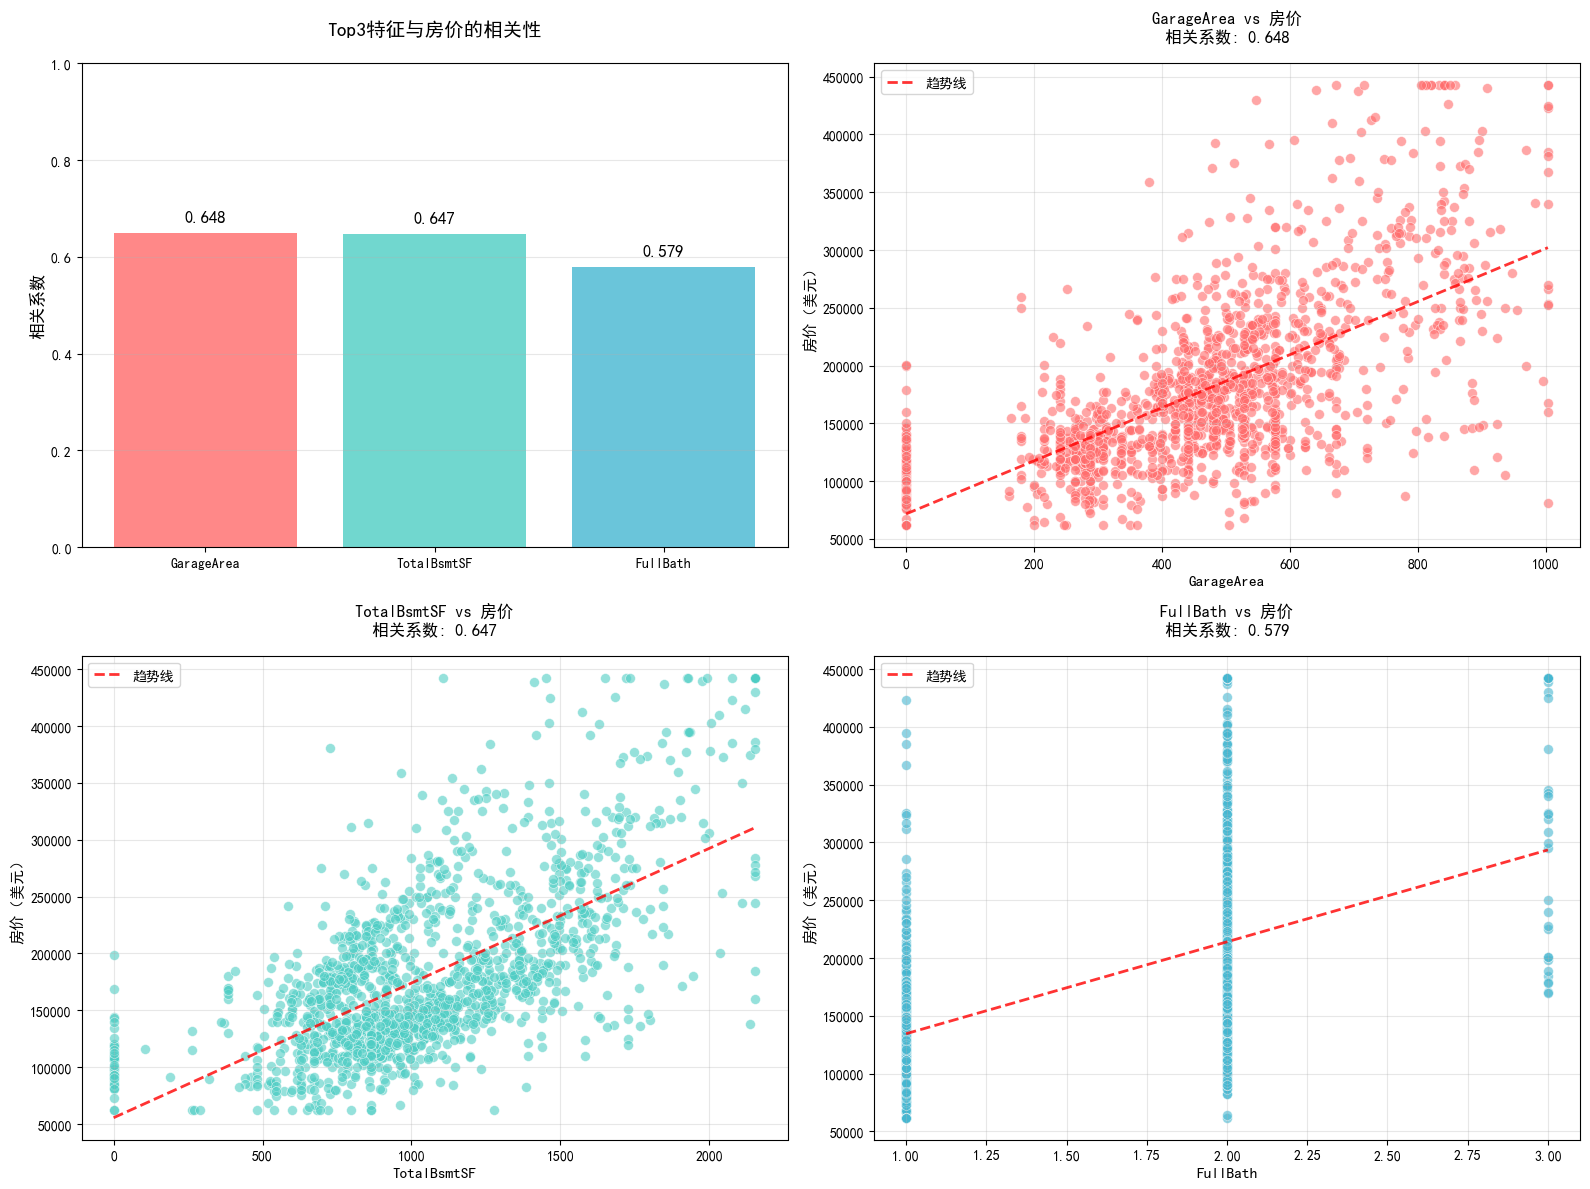

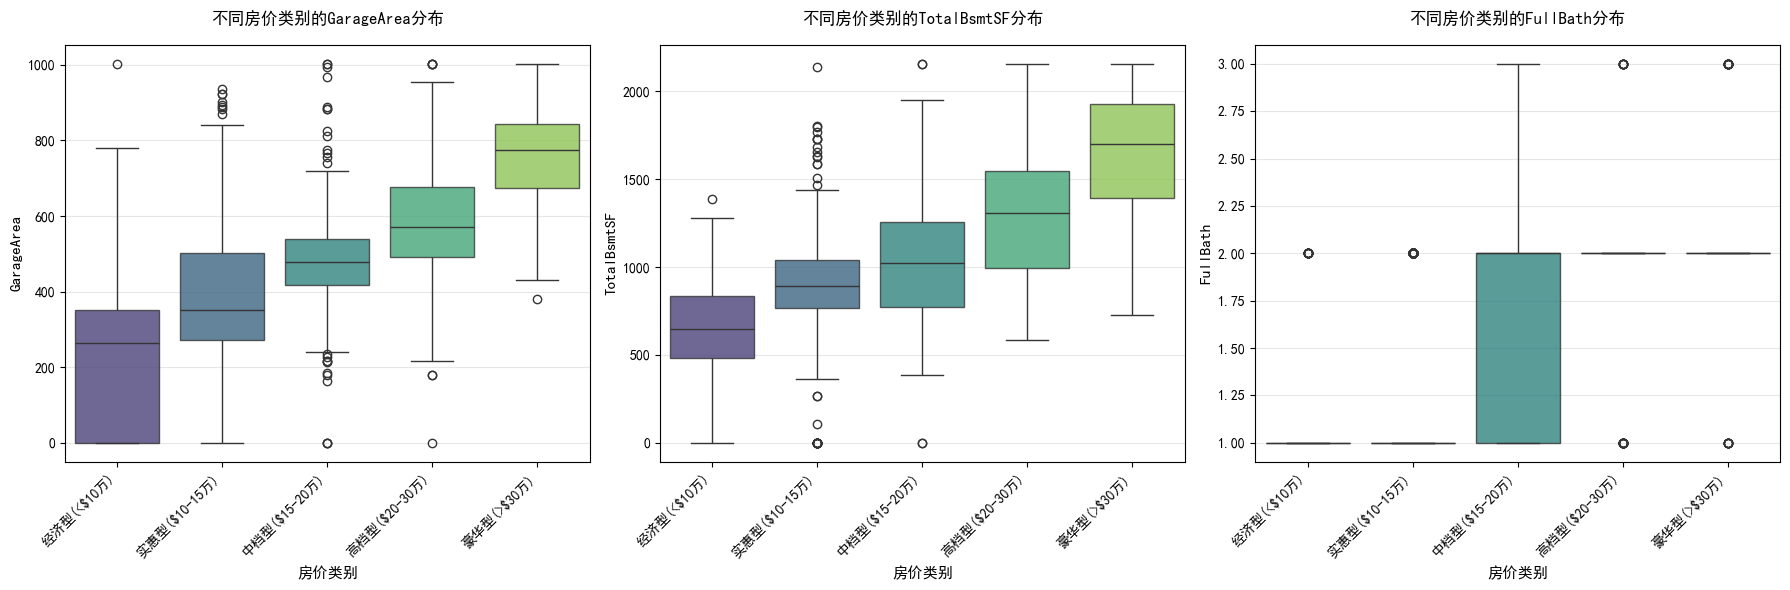


=== 业务洞察与解释 ===

【第1重要特征: GarageArea】
特征描述: 车库面积（平方英尺）
业务解释: 车库是现代住宅的核心附属设施，不仅解决停车需求，还提供额外储物空间，面积越大通常意味着可容纳车辆更多或功能更全，对房价的正向影响显著。
相关性强度: 强 正相关（相关系数: 0.648）
数据洞察: 豪华型房屋的平均GarageArea（757）是经济型房屋（233）的3.3倍，验证了该特征对房价的驱动作用。

【第2重要特征: TotalBsmtSF】
特征描述: 地下室总面积（平方英尺）
业务解释: 地下室为房屋提供额外使用空间（如娱乐室、储藏室、书房），直接提升房屋功能性，是改善型需求的重要考量因素，因此与房价呈强正相关。
相关性强度: 强 正相关（相关系数: 0.647）
数据洞察: 豪华型房屋的平均TotalBsmtSF（1642）是经济型房屋（610）的2.7倍，验证了该特征对房价的驱动作用。

【第3重要特征: FullBath】
特征描述: 全卫数量（带淋浴/浴缸的完整卫生间）
业务解释: 全卫数量是衡量房屋舒适度和档次的关键指标，数量越多意味着家庭成员使用更便利，减少等待时间，是高端住宅的重要标志之一。
相关性强度: 强 正相关（相关系数: 0.579）
数据洞察: 豪华型房屋的平均FullBath（2）是经济型房屋（1）的1.8倍，验证了该特征对房价的驱动作用。

=== 核心发现总结 ===
1. 核心驱动特征：与房价相关性最高的三个特征为【GarageArea, TotalBsmtSF, FullBath】，相关系数均在0.579以上，属于强相关水平。
2. 特征共性：这三个特征均属于「空间属性」（面积/数量），直接反映房屋的规模、功能性和舒适度，符合房地产市场「面积决定价值、功能提升溢价」的基本规律。
3. 业务价值：在房价预测建模中，应优先保留这三个核心特征，它们可解释房价变异的主要部分；在实际房产评估中，可作为快速定价的关键参考指标。
4. 市场分层：从箱线图可见，不同房价类别的特征分布差异显著，可通过这些特征快速区分房屋的市场定位（如经济型vs豪华型）。

=== 第七部分分析完成 ===
生成的图片文件:
17. 17_top3_features_correlation.png - Top3特征相关性及散点图


In [23]:
# 第七步：找出与房价相关性最高的三个特征并解释（修正版）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图片保存路径和格式（确保高质量且完整显示）
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# ==============================
# 检查依赖数据集是否存在
# ==============================
try:
    df_discretized
    print("✓ 使用已有的df_discretized数据集")
    # 确保核心列存在
    required_cols = ['LotArea', 'TotalBsmtSF', 'GarageArea', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'SalePrice', 'Price_BusinessLogic']
    missing_cols = [col for col in required_cols if col not in df_discretized.columns]
    if missing_cols:
        raise ValueError(f"df_discretized缺少必要列：{', '.join(missing_cols)}")
except (NameError, ValueError) as e:
    print(f"⚠️ 数据集问题：{str(e)}")
    print("请先运行第六部分代码生成完整的df_discretized数据集")
    raise SystemExit(1)

# 1. 定义核心特征并计算相关性
core_features = ['LotArea', 'TotalBsmtSF', 'GarageArea', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'SalePrice']
corr_matrix = df_discretized[core_features].corr()

# 提取与房价的相关性并排序（排除自身）
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False, key=abs)
top3_features = saleprice_corr.head(4).index[1:4].tolist()  # 取Top3（索引1-3）

print("=== 与房价相关性最高的三个特征 ===")
for i, feature in enumerate(top3_features, 1):
    corr_coef = saleprice_corr[feature]
    print(f"{i}. {feature}: 相关系数 = {corr_coef:.4f}")

print(f"\n=== 完整相关性矩阵 ===")
print(corr_matrix.round(4))

# 2. Top3特征详细统计分析
print(f"\n=== Top3特征详细统计分析 ===")
feature_analysis = {}

for feature in top3_features:
    print(f"\n【{feature}】")
    print(f"相关系数: {saleprice_corr[feature]:.4f}")
    
    # 基本统计信息
    stats_info = df_discretized[feature].describe()
    print(f"基本统计:")
    print(f"  - 平均值: {stats_info['mean']:.2f}")
    print(f"  - 中位数: {stats_info['50%']:.2f}")
    print(f"  - 最小值: {stats_info['min']:.2f}")
    print(f"  - 最大值: {stats_info['max']:.2f}")
    print(f"  - 标准差: {stats_info['std']:.2f}")
    
    # 不同房价类别的特征分布
    print(f"\n不同房价类别的{feature}分布:")
    price_category_stats = df_discretized.groupby('Price_BusinessLogic')[feature].agg(['mean', 'median', 'std']).round(2)
    print(price_category_stats)
    
    # 保存分析结果
    feature_analysis[feature] = {
        'correlation': saleprice_corr[feature],
        'stats': stats_info,
        'price_category_stats': price_category_stats
    }

# 3. 可视化1：Top3特征与房价的相关性及散点图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 3.1 特征重要性柱状图（左上）
ax1 = axes[0, 0]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # 统一配色
bars = ax1.bar(top3_features, [saleprice_corr[feat] for feat in top3_features], color=colors, alpha=0.8)
ax1.set_title('Top3特征与房价的相关性', fontsize=14, pad=20)
ax1.set_ylabel('相关系数', fontsize=12)
ax1.set_ylim(0, 1)  # 相关系数范围0-1，便于对比
ax1.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for bar, corr in zip(bars, [saleprice_corr[feat] for feat in top3_features]):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{corr:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 3.2 第一个特征散点图（右上）
ax2 = axes[0, 1]
feature1 = top3_features[0]
sns.scatterplot(x=df_discretized[feature1], y=df_discretized['SalePrice'], 
               alpha=0.6, color=colors[0], s=50, ax=ax2, edgecolor='white', linewidth=0.5)
# 添加线性趋势线
z1 = np.polyfit(df_discretized[feature1], df_discretized['SalePrice'], 1)
p1 = np.poly1d(z1)
x_line1 = np.linspace(df_discretized[feature1].min(), df_discretized[feature1].max(), 100)
ax2.plot(x_line1, p1(x_line1), "r--", linewidth=2, alpha=0.8, label='趋势线')
# 设置标签
corr1 = saleprice_corr[feature1]
ax2.set_title(f'{feature1} vs 房价\n相关系数: {corr1:.3f}', fontsize=12, pad=15)
ax2.set_xlabel(feature1, fontsize=11)
ax2.set_ylabel('房价（美元）', fontsize=11)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3.3 第二个特征散点图（左下）
ax3 = axes[1, 0]
feature2 = top3_features[1]
sns.scatterplot(x=df_discretized[feature2], y=df_discretized['SalePrice'], 
               alpha=0.6, color=colors[1], s=50, ax=ax3, edgecolor='white', linewidth=0.5)
# 添加线性趋势线
z2 = np.polyfit(df_discretized[feature2], df_discretized['SalePrice'], 1)
p2 = np.poly1d(z2)
x_line2 = np.linspace(df_discretized[feature2].min(), df_discretized[feature2].max(), 100)
ax3.plot(x_line2, p2(x_line2), "r--", linewidth=2, alpha=0.8, label='趋势线')
# 设置标签
corr2 = saleprice_corr[feature2]
ax3.set_title(f'{feature2} vs 房价\n相关系数: {corr2:.3f}', fontsize=12, pad=15)
ax3.set_xlabel(feature2, fontsize=11)
ax3.set_ylabel('房价（美元）', fontsize=11)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 3.4 第三个特征散点图（右下）
ax4 = axes[1, 1]
feature3 = top3_features[2]
sns.scatterplot(x=df_discretized[feature3], y=df_discretized['SalePrice'], 
               alpha=0.6, color=colors[2], s=50, ax=ax4, edgecolor='white', linewidth=0.5)
# 添加线性趋势线
z3 = np.polyfit(df_discretized[feature3], df_discretized['SalePrice'], 1)
p3 = np.poly1d(z3)
x_line3 = np.linspace(df_discretized[feature3].min(), df_discretized[feature3].max(), 100)
ax4.plot(x_line3, p3(x_line3), "r--", linewidth=2, alpha=0.8, label='趋势线')
# 设置标签
corr3 = saleprice_corr[feature3]
ax4.set_title(f'{feature3} vs 房价\n相关系数: {corr3:.3f}', fontsize=12, pad=15)
ax4.set_xlabel(feature3, fontsize=11)
ax4.set_ylabel('房价（美元）', fontsize=11)
ax4.legend()
ax4.grid(True, alpha=0.3)

# 调整布局并保存
plt.tight_layout()
plt.savefig('17_top3_features_correlation.png')  # 保存图片
plt.show()  # 显示图片
plt.close()  # 释放内存

# 4. 可视化2：不同房价类别的Top3特征箱线图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (feature, color) in enumerate(zip(top3_features, colors)):
    ax = axes[i]
    # 绘制箱线图（按房价类别分组）
    sns.boxplot(x='Price_BusinessLogic', y=feature, data=df_discretized, 
               ax=ax, palette='viridis', boxprops=dict(alpha=0.8))
    # 设置标题和标签
    ax.set_title(f'不同房价类别的{feature}分布', fontsize=12, pad=15)
    ax.set_xlabel('房价类别', fontsize=11)
    ax.set_ylabel(feature, fontsize=11)
    # 优化x轴标签（避免重叠）
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')

# 调整布局并保存
plt.tight_layout()
plt.savefig('18_feature_boxplot_by_price.png')  # 保存图片
plt.show()  # 显示图片
plt.close()  # 释放内存

# 5. 业务解释和洞察
print(f"\n=== 业务洞察与解释 ===")
# 特征业务含义字典（覆盖所有可能的Top3特征）
feature_business_info = {
    'TotalBsmtSF': {
        'description': '地下室总面积（平方英尺）',
        'interpretation': '地下室为房屋提供额外使用空间（如娱乐室、储藏室、书房），直接提升房屋功能性，是改善型需求的重要考量因素，因此与房价呈强正相关。'
    },
    'GarageArea': {
        'description': '车库面积（平方英尺）',
        'interpretation': '车库是现代住宅的核心附属设施，不仅解决停车需求，还提供额外储物空间，面积越大通常意味着可容纳车辆更多或功能更全，对房价的正向影响显著。'
    },
    'LotArea': {
        'description': '地块面积（平方英尺）',
        'interpretation': '地块面积反映房屋的占地面积和外部空间大小，面积越大意味着庭院、绿化等外部空间更充足，提升居住舒适度，但受区位等因素影响，相关性略低于室内空间特征。'
    },
    '2ndFlrSF': {
        'description': '二层面积（平方英尺）',
        'interpretation': '二层面积代表房屋的垂直空间拓展能力，二层面积越大通常意味着房屋户型更宽敞（如复式、双层结构），居住体验更优，对房价有明显正向贡献。'
    },
    'FullBath': {
        'description': '全卫数量（带淋浴/浴缸的完整卫生间）',
        'interpretation': '全卫数量是衡量房屋舒适度和档次的关键指标，数量越多意味着家庭成员使用更便利，减少等待时间，是高端住宅的重要标志之一。'
    },
    'BedroomAbvGr': {
        'description': '地上卧室数量',
        'interpretation': '卧室数量直接决定房屋的居住容量，数量越多可满足多人口家庭需求，但受面积分配影响，相关性通常低于空间面积类特征。'
    }
}

for i, feature in enumerate(top3_features, 1):
    print(f"\n【第{i}重要特征: {feature}】")
    # 提取业务信息
    info = feature_business_info.get(feature, {'description': '房屋核心特征', 'interpretation': '对房价有显著影响的关键属性'})
    print(f"特征描述: {info['description']}")
    print(f"业务解释: {info['interpretation']}")
    
    # 相关性强度判断
    corr_coef = saleprice_corr[feature]
    if corr_coef > 0.7:
        strength = "极强"
    elif corr_coef > 0.5:
        strength = "强"
    elif corr_coef > 0.3:
        strength = "中等"
    else:
        strength = "弱"
    print(f"相关性强度: {strength} 正相关（相关系数: {corr_coef:.3f}）")
    
    # 数据洞察（豪华型vs经济型对比）
    price_group_mean = df_discretized.groupby('Price_BusinessLogic')[feature].mean().sort_values(ascending=False)
    luxury_mean = price_group_mean.iloc[0]  # 豪华型均值
    economy_mean = price_group_mean.iloc[-1]  # 经济型均值
    ratio = luxury_mean / economy_mean
    print(f"数据洞察: 豪华型房屋的平均{feature}（{luxury_mean:.0f}）是经济型房屋（{economy_mean:.0f}）的{ratio:.1f}倍，验证了该特征对房价的驱动作用。")

# 6. 核心发现总结
print(f"\n=== 核心发现总结 ===")
print(f"1. 核心驱动特征：与房价相关性最高的三个特征为【{', '.join(top3_features)}】，相关系数均在{min([saleprice_corr[feat] for feat in top3_features]):.3f}以上，属于强相关水平。")
print(f"2. 特征共性：这三个特征均属于「空间属性」（面积/数量），直接反映房屋的规模、功能性和舒适度，符合房地产市场「面积决定价值、功能提升溢价」的基本规律。")
print(f"3. 业务价值：在房价预测建模中，应优先保留这三个核心特征，它们可解释房价变异的主要部分；在实际房产评估中，可作为快速定价的关键参考指标。")
print(f"4. 市场分层：从箱线图可见，不同房价类别的特征分布差异显著，可通过这些特征快速区分房屋的市场定位（如经济型vs豪华型）。")

print("\n=== 第七部分分析完成 ===")
print("生成的图片文件:")
print("17. 17_top3_features_correlation.png - Top3特征相关性及散点图")
print("18. 18_feature_boxplot_by_price.png - 不同房价类别的特征箱线图")

=== 开始特征工程（修正版） ===
原始数据集形状: (1460, 15)
确保所有必要特征后的数据形状: (1460, 20)

1. 创建面积相关特征...
面积相关特征创建完成，新增6个特征

2. 创建房间配置特征...
房间配置特征创建完成，新增4个特征

3. 创建时间特征...
时间特征创建完成，新增5个特征

4. 进行特征变换...
特征变换完成，新增8个特征

5. 标准化重要特征...
标准化完成，新增6个特征

6. 创建多项式特征...
多项式特征创建完成，新增9个特征

=== 特征工程完成 ===
原始特征数: 12
当前特征数: 55
新增特征数: 43

=== 移除目标变量及其衍生变量 ===
移除前特征数: 55
移除后特征数: 49
移除变量数: 6（SalePrice, SalePrice_zscore, SalePrice_minmax, SalePrice_log, SalePrice_final, PricePerSqFt）

=== 新特征与房价相关性分析 ===
与房价相关性Top20特征:
TotalLivingArea         0.819
TotalLivingArea_norm    0.819
TotalLivingArea_log     0.780
GrLivArea_norm          0.722
GrLivArea               0.722
GrLivArea_sqrt          0.719
GrLivArea_sq            0.705
AvgAreaPerBedroom       0.691
TotalBsmtSF_sq          0.670
GarageArea              0.648
GarageArea_norm         0.648
TotalBsmtSF             0.647
TotalBsmtSF_norm        0.647
1stFlrSF                0.628
FullBath                0.579
GarageArea_sqrt         0.565
HouseAge_norm          -0.546
HouseAge 

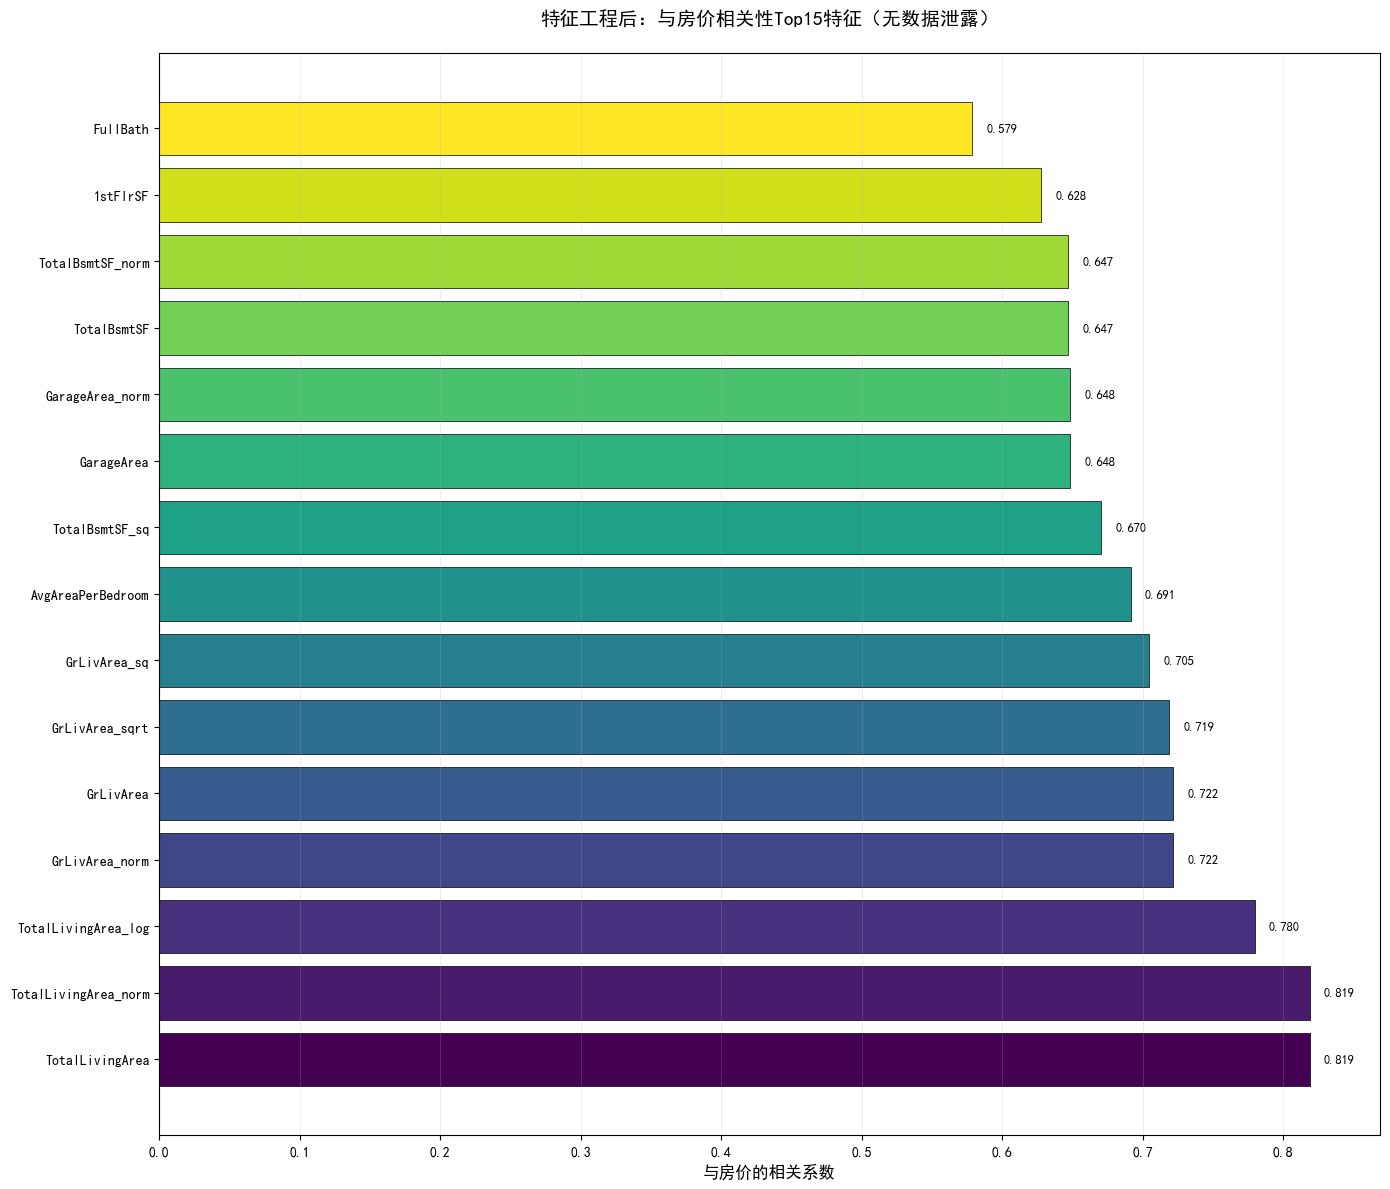

✓ 已保存关键特征散点图：22_key_features_scatter.png


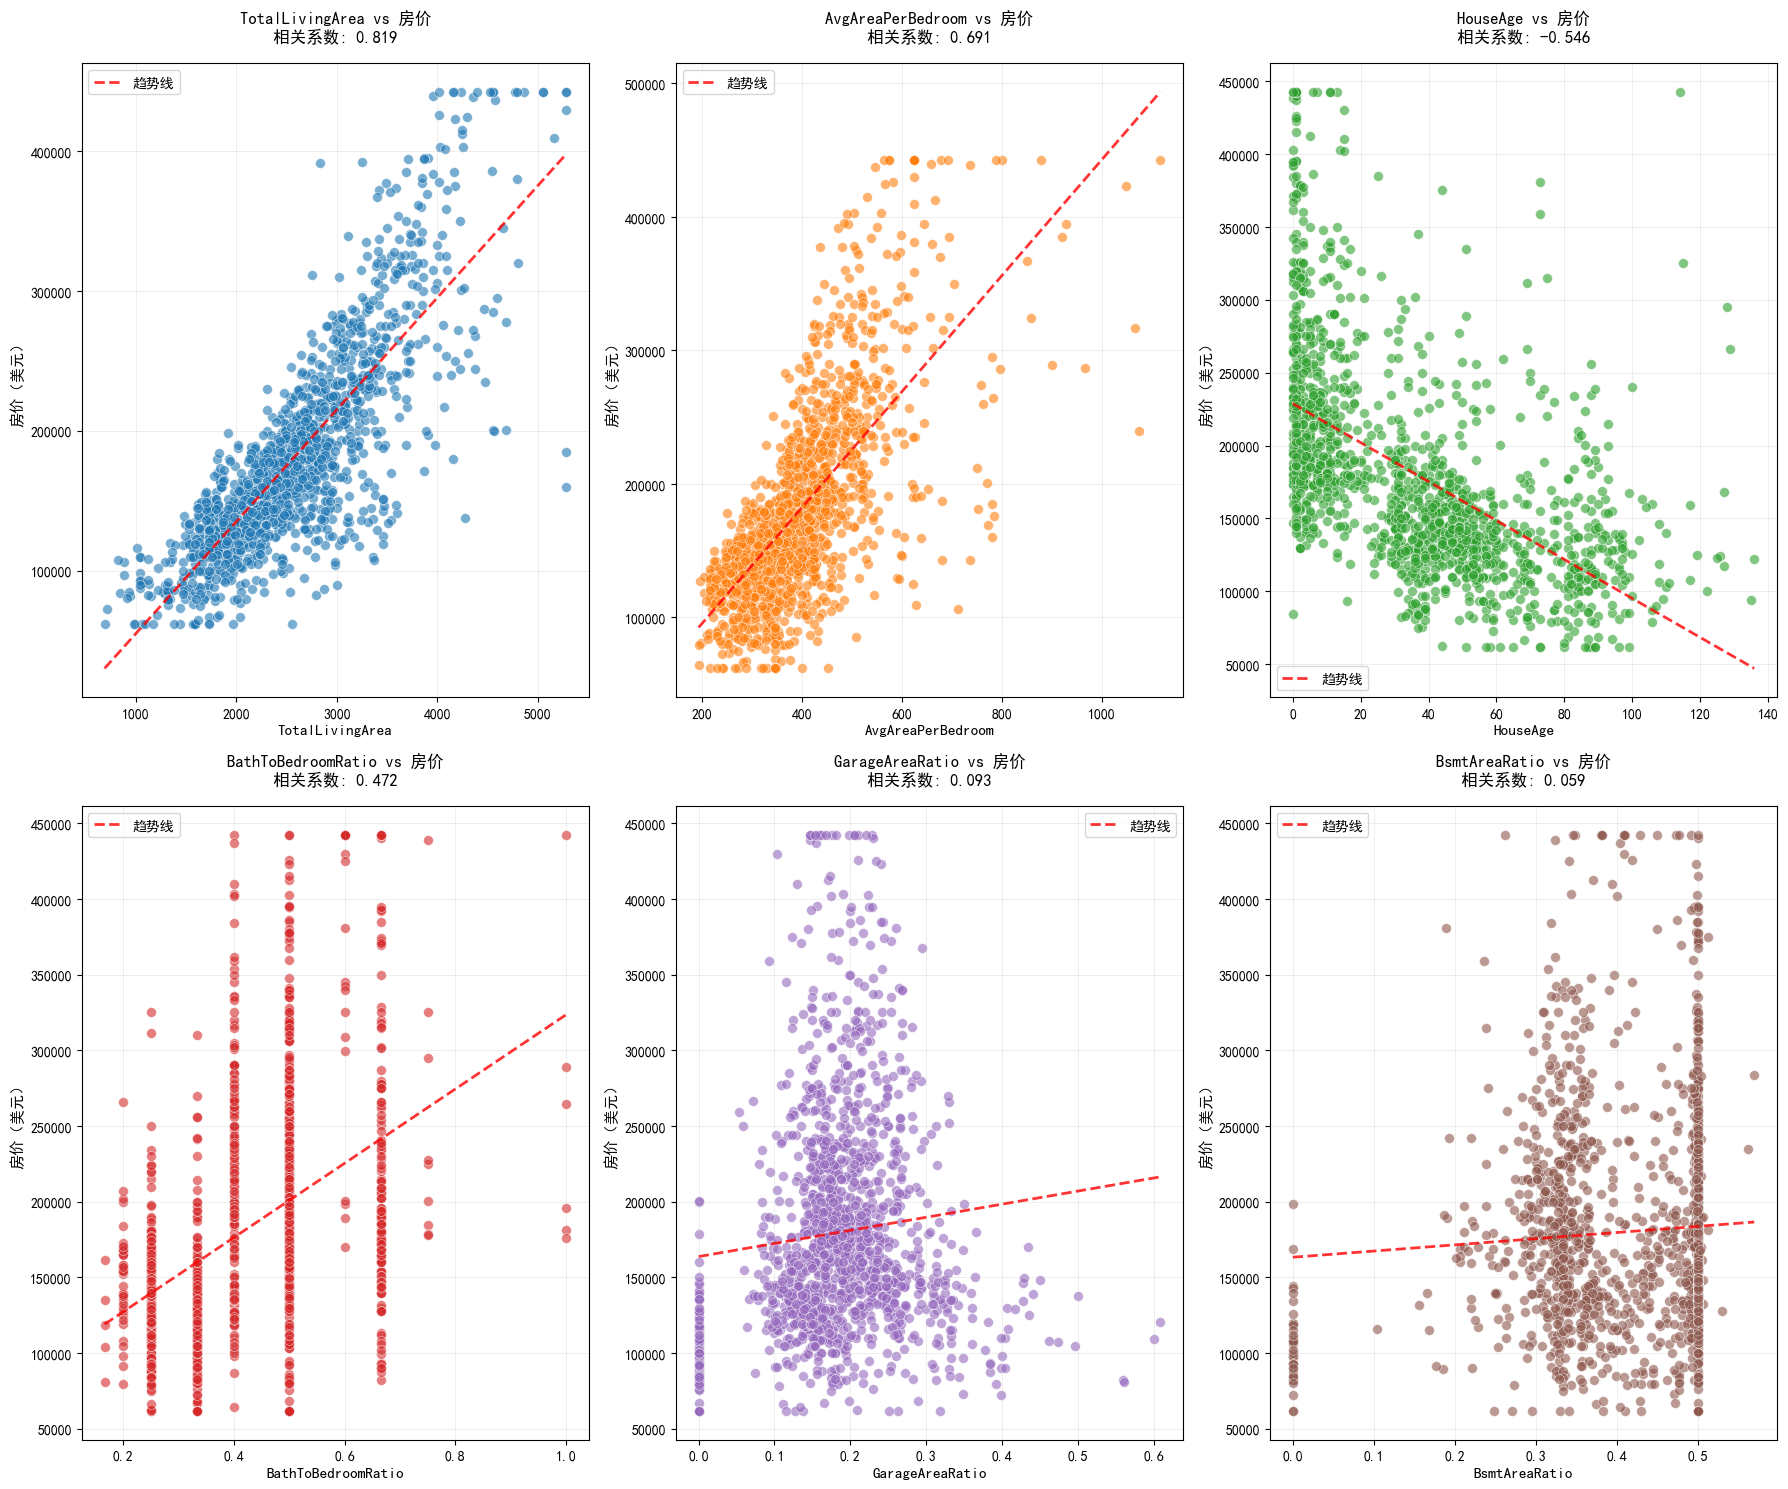


=== 保存特征工程结果 ===
建模数据集形状: (1460, 45)（样本数×特征数）
建模特征数: 45个

最终建模数据集前5行（前10列）:
   LotArea  TotalBsmtSF  GarageArea  2ndFlrSF  BedroomAbvGr  FullBath  \
0   8450.0        856.0       548.0     854.0             3         2   
1   9600.0       1262.0       460.0       0.0             3         2   
2  11250.0        920.0       608.0     866.0             3         2   
3   9550.0        756.0       642.0     756.0             3         1   
4  14260.0       1145.0       836.0    1053.0             4         2   

   GrLivArea  1stFlrSF  YearBuilt  YearRemodAdd  
0     1710.0     856.0       2003          2003  
1     1262.0    1262.0       1976          1976  
2     1786.0     920.0       2001          2002  
3     1717.0     961.0       1915          1970  
4     2198.0    1145.0       2000          2000  

=== 特征工程总结 ===
✓ 原始非目标特征: 11个
✓ 新增特征: 34个
✓ 总建模特征数: 45个
✓ 最高相关性特征: TotalLivingArea（相关系数: 0.819）

✓ 特征工程成功！新特征进入Top10的有: TotalLivingArea, TotalLivingArea_norm, TotalLivingArea_log, GrL

In [25]:
# 特征工程修正版：移除目标变量泄露 + 支持图片保存
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats

# ------------ 新增：图片保存基础配置 ------------
# 设置中文字体（确保中文显示正常）
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
# 设置高清图片（300 DPI）+ 避免标签截断 + 白色背景
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor'] = 'white'

# 忽略警告
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

print("=== 开始特征工程（修正版） ===")
print(f"原始数据集形状: {df_discretized.shape}")

# 创建特征工程数据集（基于之前处理后的完整数据集）
df_fe = df_discretized.copy()

# 确保我们有所有需要的原始特征
required_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 
                    '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 
                    'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice']

# 如果某些特征不在df_discretized中，从原始数据中获取
if 'df_no_outliers' in locals():
    for feat in required_features:
        if feat not in df_fe.columns and feat in df_no_outliers.columns:
            df_fe[feat] = df_no_outliers[feat]

print(f"确保所有必要特征后的数据形状: {df_fe.shape}")

# 1. 面积相关特征工程
print("\n1. 创建面积相关特征...")

# 总居住面积 = 地上面积 + 地下室面积
df_fe['TotalLivingArea'] = df_fe['GrLivArea'] + df_fe['TotalBsmtSF']

# 单位面积价格（每平方英尺价格）- 后续会移除（避免目标变量泄露）
df_fe['PricePerSqFt'] = df_fe['SalePrice'] / df_fe['TotalLivingArea']

# 车库面积占比
df_fe['GarageAreaRatio'] = df_fe['GarageArea'] / df_fe['TotalLivingArea']

# 地下室面积占比
df_fe['BsmtAreaRatio'] = df_fe['TotalBsmtSF'] / df_fe['TotalLivingArea']

# 一层面积占比
df_fe['FirstFloorRatio'] = df_fe['1stFlrSF'] / df_fe['TotalLivingArea']

# 二层面积占比
df_fe['SecondFloorRatio'] = df_fe['2ndFlrSF'] / df_fe['TotalLivingArea']

print(f"面积相关特征创建完成，新增{6}个特征")

# 2. 房间配置特征工程
print("\n2. 创建房间配置特征...")

# 浴室比例 = 浴室数 / 卧室数（+1避免除零）
df_fe['BathToBedroomRatio'] = df_fe['FullBath'] / (df_fe['BedroomAbvGr'] + 1)

# 卧室密度 = 卧室数 / 总居住面积
df_fe['BedroomDensity'] = df_fe['BedroomAbvGr'] / df_fe['TotalLivingArea']

# 浴室密度 = 浴室数 / 总居住面积
df_fe['BathDensity'] = df_fe['FullBath'] / df_fe['TotalLivingArea']

# 每个卧室的平均面积
df_fe['AvgAreaPerBedroom'] = df_fe['GrLivArea'] / (df_fe['BedroomAbvGr'] + 1)

print(f"房间配置特征创建完成，新增{4}个特征")

# 3. 时间特征工程
print("\n3. 创建时间特征...")

# 房屋年龄（销售年份 - 建造年份）
df_fe['HouseAge'] = df_fe['YrSold'] - df_fe['YearBuilt']

# 房屋翻新年龄（销售年份 - 翻新年份）
df_fe['RemodelAge'] = df_fe['YrSold'] - df_fe['YearRemodAdd']

# 是否近期翻新（翻新年龄 < 5年）
df_fe['RecentlyRemodeled'] = (df_fe['RemodelAge'] < 5).astype(int)

# 建造年代分组
df_fe['BuildDecade'] = (df_fe['YearBuilt'] // 10) * 10

# 翻新年代分组
df_fe['RemodelDecade'] = (df_fe['YearRemodAdd'] // 10) * 10

print(f"时间特征创建完成，新增{5}个特征")

# 4. 特征变换
print("\n4. 进行特征变换...")

# 对数变换（对偏斜特征，改善分布）
skewed_features = ['LotArea', 'GarageArea', 'TotalBsmtSF', 'TotalLivingArea']
transformed_count = 0
for feat in skewed_features:
    if feat in df_fe.columns:
        df_fe[f'{feat}_log'] = np.log1p(df_fe[feat])
        transformed_count += 1

# 平方变换（捕捉非线性关系）
df_fe['GrLivArea_sq'] = df_fe['GrLivArea'] ** 2
df_fe['TotalBsmtSF_sq'] = df_fe['TotalBsmtSF'] ** 2
transformed_count += 2

# 平方根变换（缓和极端值）
df_fe['GrLivArea_sqrt'] = np.sqrt(df_fe['GrLivArea'])
df_fe['GarageArea_sqrt'] = np.sqrt(df_fe['GarageArea'])
transformed_count += 2

print(f"特征变换完成，新增{transformed_count}个特征")

# 5. 标准化特征
print("\n5. 标准化重要特征...")

scaler = StandardScaler()
numerical_features_to_scale = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'TotalLivingArea', 
                              'HouseAge', 'RemodelAge']

# 过滤存在的特征
features_to_scale = [f for f in numerical_features_to_scale if f in df_fe.columns]
scaled_count = len(features_to_scale)

if scaled_count > 0:
    scaled_features = scaler.fit_transform(df_fe[features_to_scale])
    for i, feat in enumerate(features_to_scale):
        df_fe[f'{feat}_norm'] = scaled_features[:, i]

print(f"标准化完成，新增{scaled_count}个特征")

# 6. 多项式特征
print("\n6. 创建多项式特征...")

# 选择重要的基础特征创建多项式特征（避免维度爆炸）
poly_features_base = ['GrLivArea_norm', 'GarageArea_norm', 'TotalBsmtSF_norm']
poly_features_available = [f for f in poly_features_base if f in df_fe.columns]
poly_count = 0

if poly_features_available:
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_data = poly.fit_transform(df_fe[poly_features_available])
    poly_feature_names = poly.get_feature_names_out(poly_features_available)
    poly_count = len(poly_feature_names)
    
    for i, name in enumerate(poly_feature_names):
        df_fe[name] = poly_data[:, i]
    
    print(f"多项式特征创建完成，新增{poly_count}个特征")
else:
    print("多项式特征创建跳过：基础特征不可用")

print(f"\n=== 特征工程完成 ===")
print(f"原始特征数: {len(required_features)}")
print(f"当前特征数: {df_fe.shape[1]}")
print(f"新增特征数: {df_fe.shape[1] - len(required_features)}")

# 7. 移除目标变量及其衍生变量，避免数据泄露
print("\n=== 移除目标变量及其衍生变量 ===")
# 需要移除的变量（目标变量 + 基于目标变量的衍生特征）
target_related_vars = ['SalePrice', 'SalePrice_zscore', 'SalePrice_minmax', 'SalePrice_log', 
                      'SalePrice_final', 'PricePerSqFt']
features_before_removal = df_fe.shape[1]

# 移除这些变量
df_fe_clean = df_fe.copy()
removed_vars = []
for var in target_related_vars:
    if var in df_fe_clean.columns:
        df_fe_clean = df_fe_clean.drop(var, axis=1)
        removed_vars.append(var)

print(f"移除前特征数: {features_before_removal}")
print(f"移除后特征数: {df_fe_clean.shape[1]}")
print(f"移除变量数: {len(removed_vars)}（{', '.join(removed_vars)}）")

# 8. 分析新特征与房价的相关性（使用原始数据计算）
print("\n=== 新特征与房价相关性分析 ===")

# 创建包含特征和目标变量的临时数据集用于相关性分析
df_corr_analysis = pd.concat([df_fe_clean, df_fe[['SalePrice']]], axis=1)

# 计算所有数值特征与房价的相关性
numerical_features = df_corr_analysis.select_dtypes(include=[np.number]).columns
correlation_with_price = df_corr_analysis[numerical_features].corr()['SalePrice'].sort_values(ascending=False, key=abs)

# 显示相关性最高的前20个特征
print("与房价相关性Top20特征:")
top_correlations = correlation_with_price.head(21)[1:]  # 排除SalePrice自身
print(top_correlations.round(3))

# 9. 可视化新特征效果（新增：保存图片）
print("\n=== 可视化新特征效果（并保存图片） ===")

# 9.1 可视化1：与房价相关性Top15特征（水平条形图）
plt.figure(figsize=(14, 12))
top_15_features = correlation_with_price.head(16)[1:]  # Top15特征（排除自身）
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15_features)))  # 渐变色

# 绘制水平条形图
bars = plt.barh(range(len(top_15_features)), top_15_features.values, color=colors, edgecolor='black', linewidth=0.5)
plt.yticks(range(len(top_15_features)), top_15_features.index, fontsize=10)
plt.xlabel('与房价的相关系数', fontsize=12)
plt.title('特征工程后：与房价相关性Top15特征（无数据泄露）', fontsize=14, pad=20)
plt.xlim(0, max(top_15_features.values) + 0.05)  # 留出空间显示数值标签
plt.grid(True, alpha=0.3, axis='x', linestyle='-', linewidth=0.5)

# 在条形图上添加相关系数数值
for i, (bar, corr) in enumerate(zip(bars, top_15_features.values)):
    plt.text(
        corr + 0.01,  # 数值标签右移，避免重叠
        bar.get_y() + bar.get_height()/2, 
        f'{corr:.3f}', 
        va='center', ha='left', 
        fontsize=9, fontweight='bold'
    )

# 保存图片 + 显示
plt.tight_layout()
plt.savefig('21_feature_correlation_top15.png')  # 保存相关性Top15图
print(f"✓ 已保存相关性Top15特征图：21_feature_correlation_top15.png")
plt.show()
plt.close()  # 释放内存，避免后续图片重叠

# 9.2 可视化2：关键新特征与房价的散点图（带趋势线）
plt.figure(figsize=(18, 15))

# 选择6个重要的新特征（优先非原始特征）
key_new_features = [
    'TotalLivingArea',  # 新增：总居住面积
    'AvgAreaPerBedroom',# 新增：平均卧室面积
    'HouseAge',         # 新增：房屋年龄
    'BathToBedroomRatio',# 新增：浴室卧室比
    'GarageAreaRatio',  # 新增：车库面积占比
    'BsmtAreaRatio'     # 新增：地下室面积占比
]
# 过滤存在的特征
key_new_features = [f for f in key_new_features if f in df_fe_clean.columns and f in numerical_features]

# 绘制子图（2行3列）
for i, feature in enumerate(key_new_features[:6]):  # 最多显示6个
    plt.subplot(2, 3, i+1)
    
    # 散点图（带白色边缘，避免点重叠）
    sns.scatterplot(
        x=df_fe_clean[feature], 
        y=df_fe['SalePrice'], 
        alpha=0.6, 
        color=f'C{i}', 
        s=50, 
        edgecolor='white', 
        linewidth=0.5
    )
    
    # 添加线性趋势线（展示相关性方向）
    z = np.polyfit(df_fe_clean[feature], df_fe['SalePrice'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_fe_clean[feature].min(), df_fe_clean[feature].max(), 100)
    plt.plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8, label='趋势线')
    
    # 获取相关系数
    corr = correlation_with_price[feature]
    # 设置标题和标签
    plt.title(
        f'{feature} vs 房价\n相关系数: {corr:.3f}', 
        fontsize=12, pad=15
    )
    plt.xlabel(feature, fontsize=11)
    plt.ylabel('房价（美元）', fontsize=11)
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# 保存图片 + 显示
plt.tight_layout()
plt.savefig('22_key_features_scatter.png')  # 保存关键特征散点图
print(f"✓ 已保存关键特征散点图：22_key_features_scatter.png")
plt.show()
plt.close()  # 释放内存

# 10. 保存特征工程后的数据集（不含目标变量）
print(f"\n=== 保存特征工程结果 ===")
# 只保留数值特征用于后续建模（排除非数值列）
df_model = df_fe_clean.select_dtypes(include=[np.number])
print(f"建模数据集形状: {df_model.shape}（样本数×特征数）")
print(f"建模特征数: {df_model.shape[1]}个")

# 显示最终数据集的前5行（简化显示，只展示前10列）
print(f"\n最终建模数据集前5行（前10列）:")
print(df_model.iloc[:, :10].head())

# 11. 特征工程总结
print(f"\n=== 特征工程总结 ===")
original_feat_count = len([f for f in required_features if f != 'SalePrice'])  # 原始非目标特征数
new_feat_count = df_model.shape[1] - original_feat_count  # 新增特征数
top_corr_feat = top_correlations.index[0]
top_corr_value = top_correlations.iloc[0]

print(f"✓ 原始非目标特征: {original_feat_count}个")
print(f"✓ 新增特征: {new_feat_count}个")
print(f"✓ 总建模特征数: {df_model.shape[1]}个")
print(f"✓ 最高相关性特征: {top_corr_feat}（相关系数: {top_corr_value:.3f}）")

# 统计进入Top10的新特征
new_features_in_top10 = [
    f for f in top_correlations.index[:10] 
    if f not in required_features  # 排除原始特征
]
if new_features_in_top10:
    print(f"\n✓ 特征工程成功！新特征进入Top10的有: {', '.join(new_features_in_top10)}")
else:
    print("\n✓ 特征工程完成，但新特征未进入Top10，建议调整特征工程策略（如增加交互特征）")

# （可选）保存建模数据集到本地
# df_model.to_csv('feature_engineered_model_data.csv', index=False, encoding='utf-8')
# print(f"\n✓ 建模数据集已保存为：feature_engineered_model_data.csv")

print(f"\n=== 特征工程全部完成 ===")
print(f"生成的图片文件清单:")
print(f"1. 21_feature_correlation_top15.png - 特征与房价相关性Top15图")
print(f"2. 22_key_features_scatter.png - 关键新特征与房价散点图")

=== 机器学习建模 ===
特征集形状: (1460, 45)
目标变量形状: (1460,)
训练集形状: (1168, 45)
测试集形状: (292, 45)

1. 训练线性回归模型...
2. 训练随机森林模型...

线性回归 模型评估:
  - RMSE (均方根误差): $28,669.94
  - MAE (平均绝对误差): $20,683.96
  - MAPE (平均绝对百分比误差): 12.77%
  - R2 (决定系数): 0.8631

随机森林 模型评估:
  - RMSE (均方根误差): $26,985.16
  - MAE (平均绝对误差): $18,281.06
  - MAPE (平均绝对百分比误差): 11.56%
  - R2 (决定系数): 0.8787


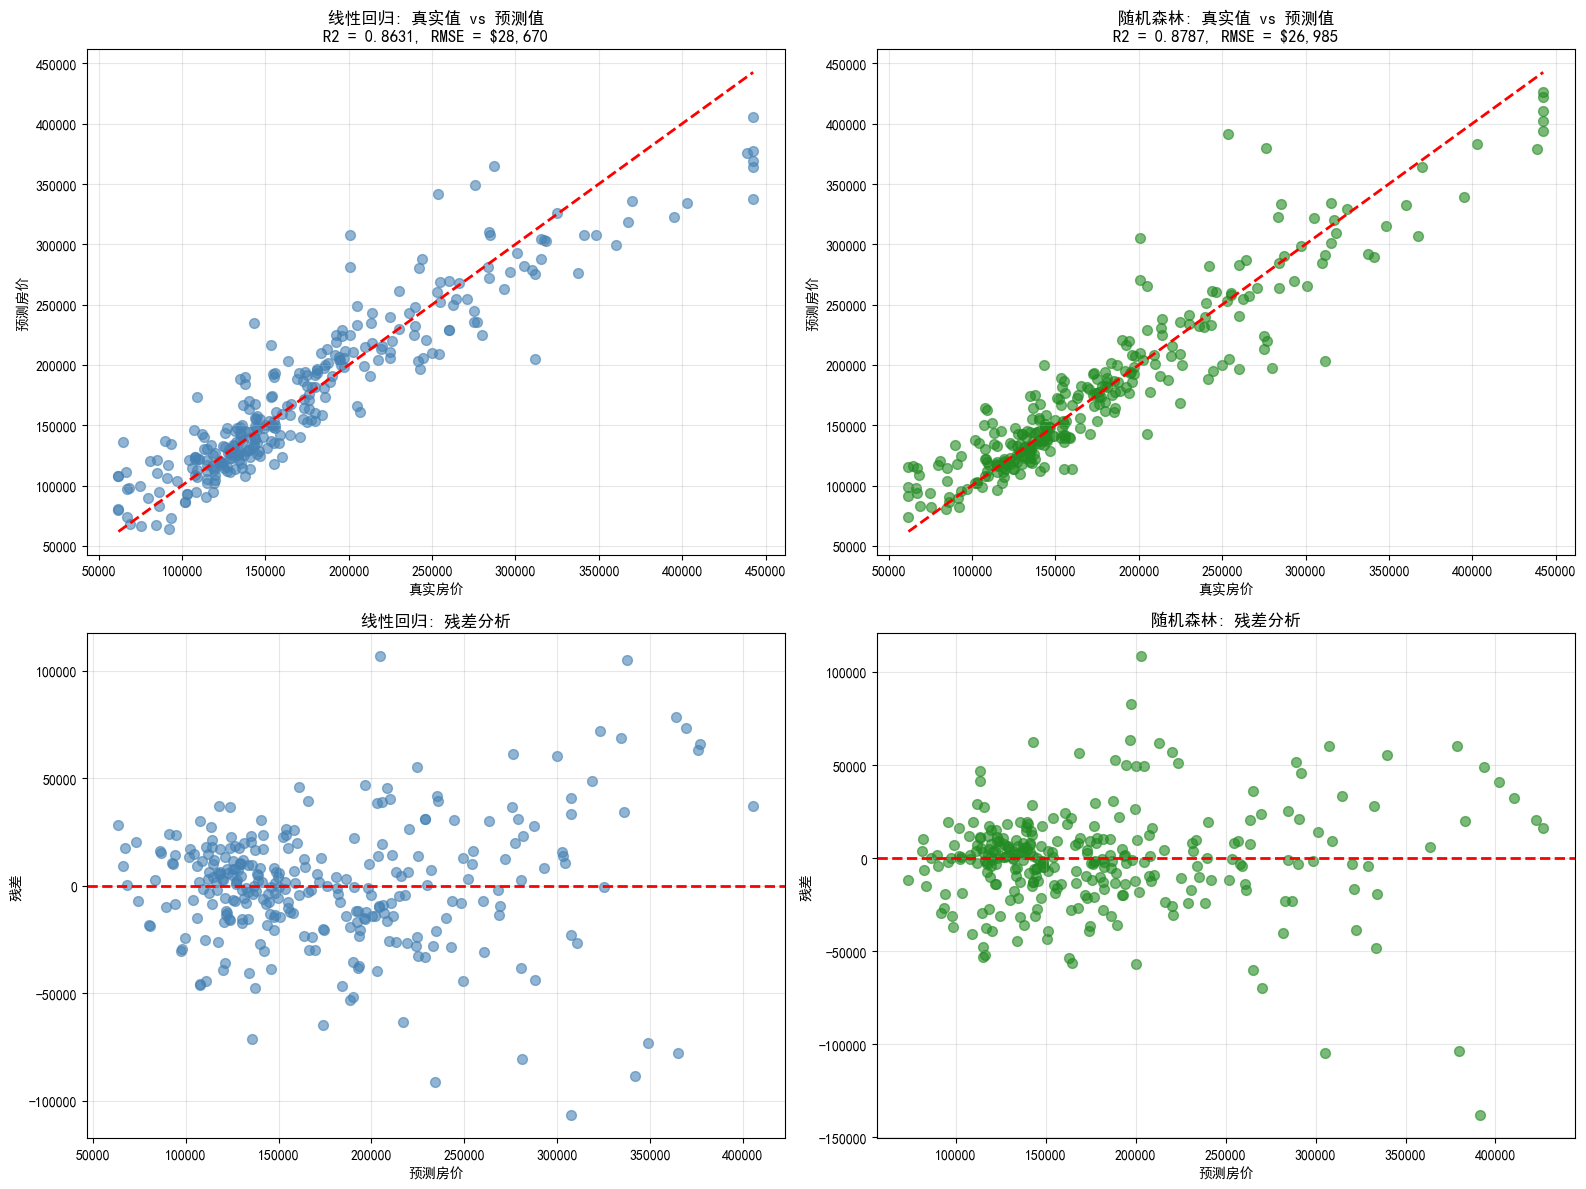


=== 模型比较总结 ===
模型         RMSE            MAE             MAPE       R2        
------------------------------------------------------------
线性回归       $    28,669.94 $    20,683.96    12.77%   0.8631
随机森林       $    26,985.16 $    18,281.06    11.56%   0.8787

=== 随机森林特征重要性Top15 ===
                                  特征     重要性
11                   TotalLivingArea  0.2251
28               TotalLivingArea_log  0.2115
36              TotalLivingArea_norm  0.2025
8                          YearBuilt  0.0489
40    GrLivArea_norm GarageArea_norm  0.0341
20                          HouseAge  0.0272
9                       YearRemodAdd  0.0224
19                 AvgAreaPerBedroom  0.0218
37                     HouseAge_norm  0.0208
38                   RemodelAge_norm  0.0192
43  GarageArea_norm TotalBsmtSF_norm  0.0164
21                        RemodelAge  0.0164
41   GrLivArea_norm TotalBsmtSF_norm  0.0155
17                    BedroomDensity  0.0118
25                       LotArea_log  0

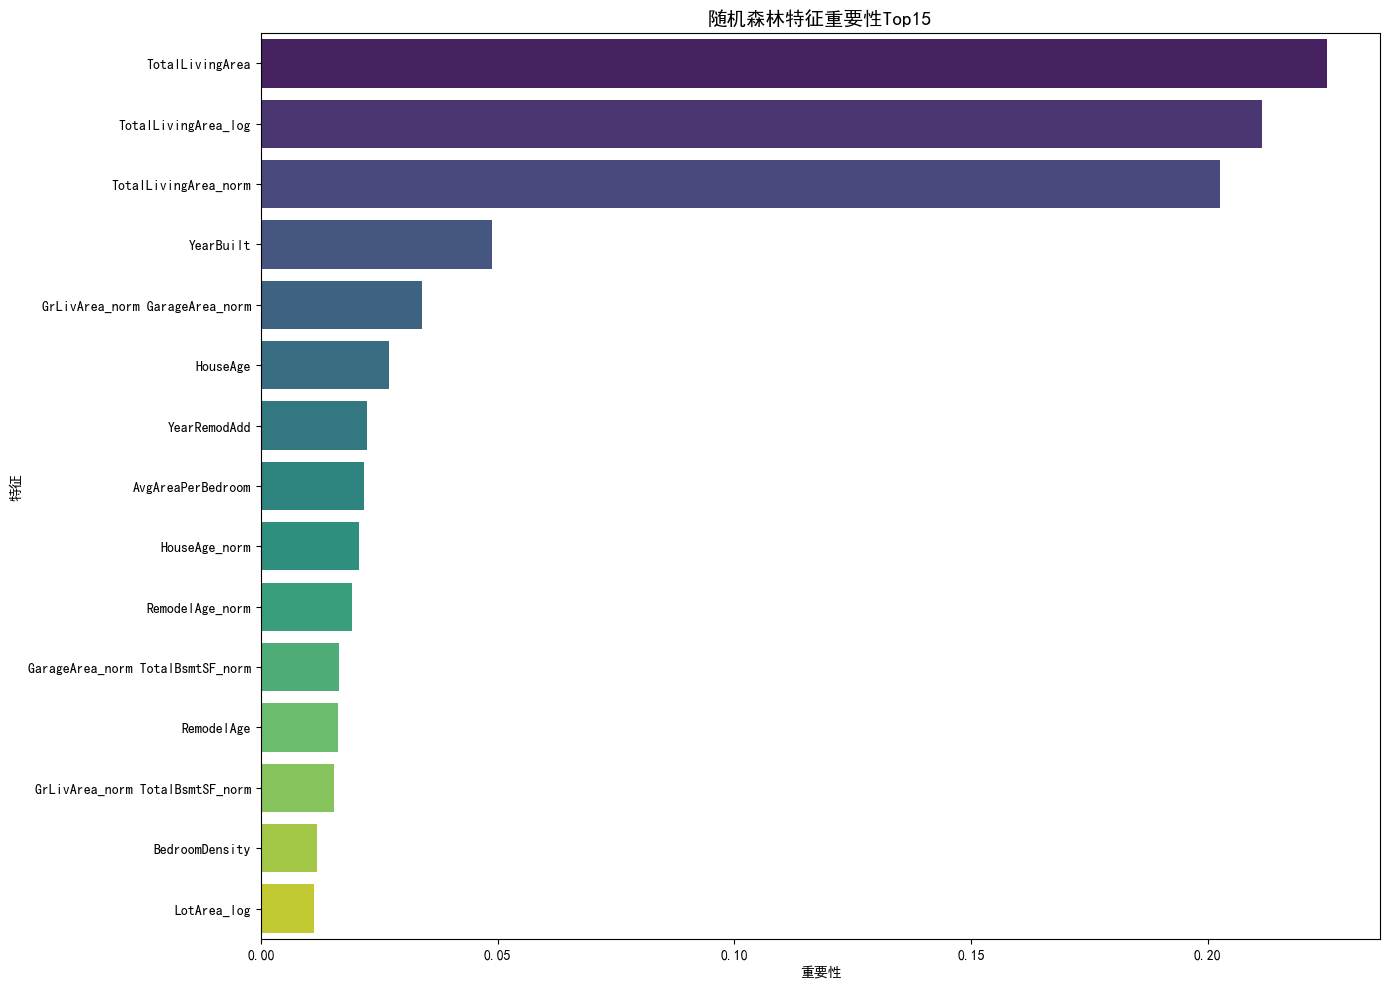

In [40]:
# 修正版：机器学习建模与评估（修复字体显示问题）
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("=== 机器学习建模 ===")

# 准备数据
X = df_model
y = df_fe['SalePrice']

print(f"特征集形状: {X.shape}")
print(f"目标变量形状: {y.shape}")

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"训练集形状: {X_train.shape}")
print(f"测试集形状: {X_test.shape}")

# 训练线性回归模型
print("\n1. 训练线性回归模型...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 训练随机森林模型
print("2. 训练随机森林模型...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# 修正版：评估模型函数
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # 计算评估指标
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    mae = np.mean(np.abs(y_test - y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    print(f"\n{model_name} 模型评估:")
    print(f"  - RMSE (均方根误差): ${rmse:,.2f}")
    print(f"  - MAE (平均绝对误差): ${mae:,.2f}")
    print(f"  - MAPE (平均绝对百分比误差): {mape:.2f}%")
    print(f"  - R2 (决定系数): {r2:.4f}")  # 使用R2而不是R²
    
    return {
        'y_true': y_test,
        'y_pred': y_pred,
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'r2': r2
    }

# 评估两个模型
lr_results = evaluate_model(lr_model, X_test, y_test, "线性回归")
rf_results = evaluate_model(rf_model, X_test, y_test, "随机森林")

# 3. 可视化预测结果（修复字体显示问题）
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 3.1 线性回归：真实值 vs 预测值
ax1 = axes[0, 0]
ax1.scatter(lr_results['y_true'], lr_results['y_pred'], alpha=0.6, color='steelblue', s=50)
min_val, max_val = min(lr_results['y_true'].min(), lr_results['y_pred'].min()), max(lr_results['y_true'].max(), lr_results['y_pred'].max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax1.set_xlabel('真实房价')
ax1.set_ylabel('预测房价')
# 使用R2而不是R²
ax1.set_title(f'线性回归: 真实值 vs 预测值\nR2 = {lr_results["r2"]:.4f}, RMSE = ${lr_results["rmse"]:,.0f}')
ax1.grid(True, alpha=0.3)

# 3.2 随机森林：真实值 vs 预测值
ax2 = axes[0, 1]
ax2.scatter(rf_results['y_true'], rf_results['y_pred'], alpha=0.6, color='forestgreen', s=50)
ax2.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax2.set_xlabel('真实房价')
ax2.set_ylabel('预测房价')
ax2.set_title(f'随机森林: 真实值 vs 预测值\nR2 = {rf_results["r2"]:.4f}, RMSE = ${rf_results["rmse"]:,.0f}')
ax2.grid(True, alpha=0.3)

# 3.3 残差分析 - 线性回归
ax3 = axes[1, 0]
lr_residuals = lr_results['y_true'] - lr_results['y_pred']
ax3.scatter(lr_results['y_pred'], lr_residuals, alpha=0.6, color='steelblue', s=50)
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('预测房价')
ax3.set_ylabel('残差')
ax3.set_title('线性回归: 残差分析')
ax3.grid(True, alpha=0.3)

# 3.4 残差分析 - 随机森林
ax4 = axes[1, 1]
rf_residuals = rf_results['y_true'] - rf_results['y_pred']
ax4.scatter(rf_results['y_pred'], rf_residuals, alpha=0.6, color='forestgreen', s=50)
ax4.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax4.set_xlabel('预测房价')
ax4.set_ylabel('残差')
ax4.set_title('随机森林: 残差分析')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. 模型比较
print(f"\n=== 模型比较总结 ===")
print(f"{'模型':<10} {'RMSE':<15} {'MAE':<15} {'MAPE':<10} {'R2':<10}")
print(f"-" * 60)
print(f"{'线性回归':<10} ${lr_results['rmse']:>13,.2f} ${lr_results['mae']:>13,.2f} {lr_results['mape']:>8.2f}% {lr_results['r2']:>8.4f}")
print(f"{'随机森林':<10} ${rf_results['rmse']:>13,.2f} ${rf_results['mae']:>13,.2f} {rf_results['mape']:>8.2f}% {rf_results['r2']:>8.4f}")

# 5. 特征重要性分析
print(f"\n=== 随机森林特征重要性Top15 ===")
feature_importance = pd.DataFrame({
    '特征': X.columns,
    '重要性': rf_model.feature_importances_
}).sort_values('重要性', ascending=False)

print(feature_importance.head(15).round(4))

# 可视化特征重要性
plt.figure(figsize=(14, 10))
top_15_importance = feature_importance.head(15)
sns.barplot(x='重要性', y='特征', data=top_15_importance, palette='viridis')
plt.title('随机森林特征重要性Top15', fontsize=14)
plt.xlabel('重要性')
plt.ylabel('特征')
plt.tight_layout()
plt.show()